In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import chi2, f_classif

from sklearn.model_selection import train_test_split, GridSearchCV

from scipy.stats import shapiro, kstest, normaltest,skew

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
import pickle

In [124]:
import re

### Problem Statement 

### Data Gathering

In [4]:
autos_df= pd.read_csv('autos_dataset.csv')
autos_df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [5]:
autos_df.drop('make',axis = 1, inplace=True)

In [6]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [7]:
autos_df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [8]:
autos_df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
for col in autos_df.columns:
    val_cnt= autos_df[col].value_counts()
    print(val_cnt)
    print('-'*20)

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
--------------------
normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64
--------------------
fuel-type
gas       185
diesel     20
Name: count, dtype: int64
--------------------
aspiration
std      168
turbo     37
Name: count, dtype: int64
--------------------
num-of-doors
four    114
two      89
?         2
Name: count, dtype: int64
--------------------
body-style
sedan          96
hatchback 

In [10]:
categorical_col = ['symboling', 'fuel-type', 'aspiration','num-of-doors', 'body-style',
                   'drive-wheels', 'fuel-system','engine-location', 'engine-type','num-of-cylinders']

numerical_col   = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                   'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                    'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
                   

In [11]:
nominal_cols=['fuel-type', 'aspiration','num-of-doors', 'body-style',
              'drive-wheels', 'engine-location', 'engine-type','fuel-system']

ordinal_cols=['symboling','num-of-cylinders']

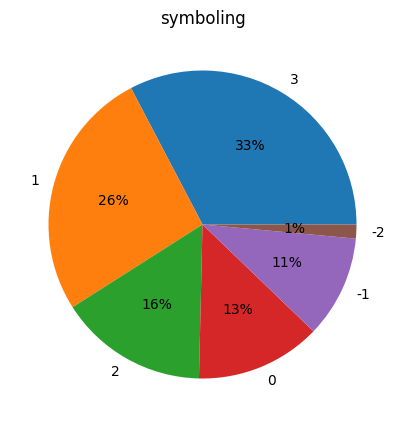

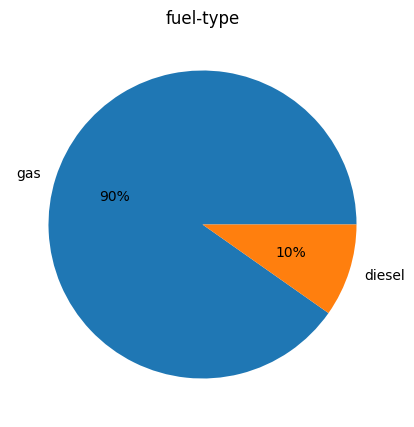

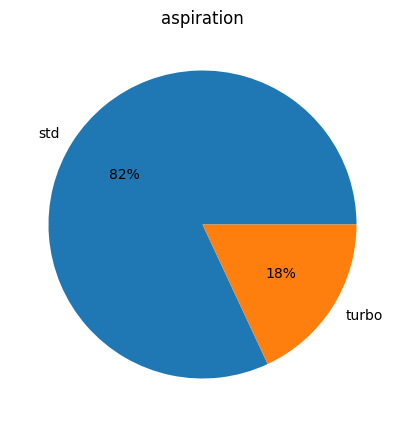

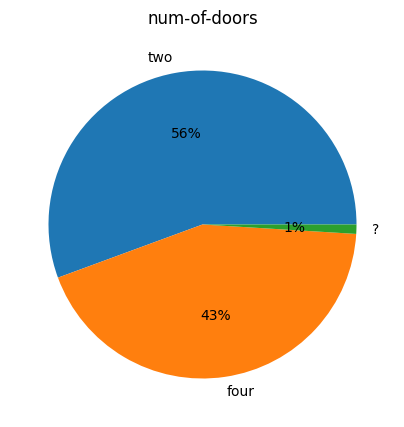

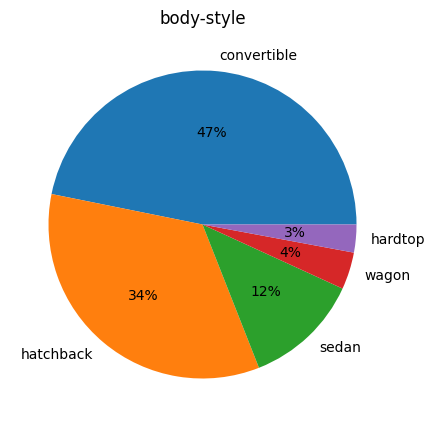

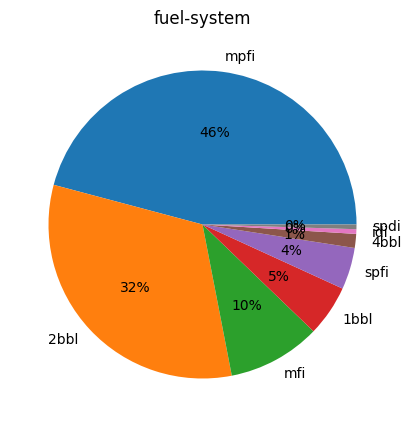

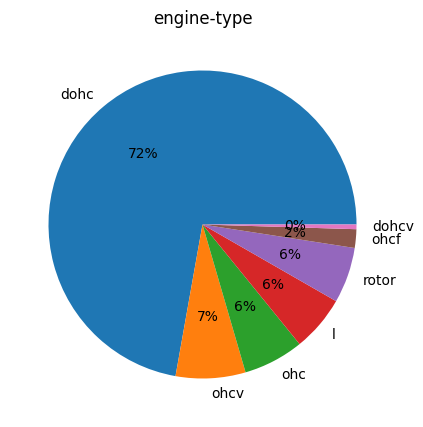

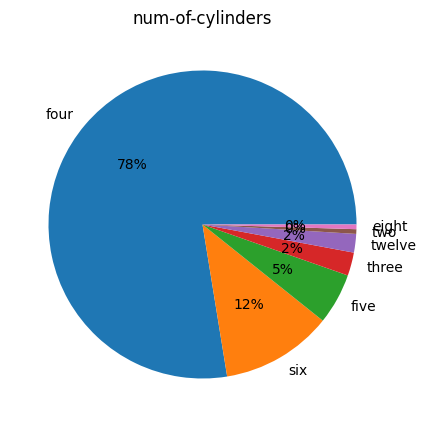

In [12]:
for column in categorical_col:
    plt.figure(figsize=(5,5))
    plt.pie(autos_df[column].value_counts(),labels=autos_df[column].unique().tolist(), autopct='%.0f%%')
    plt.title(column)
    plt.show()

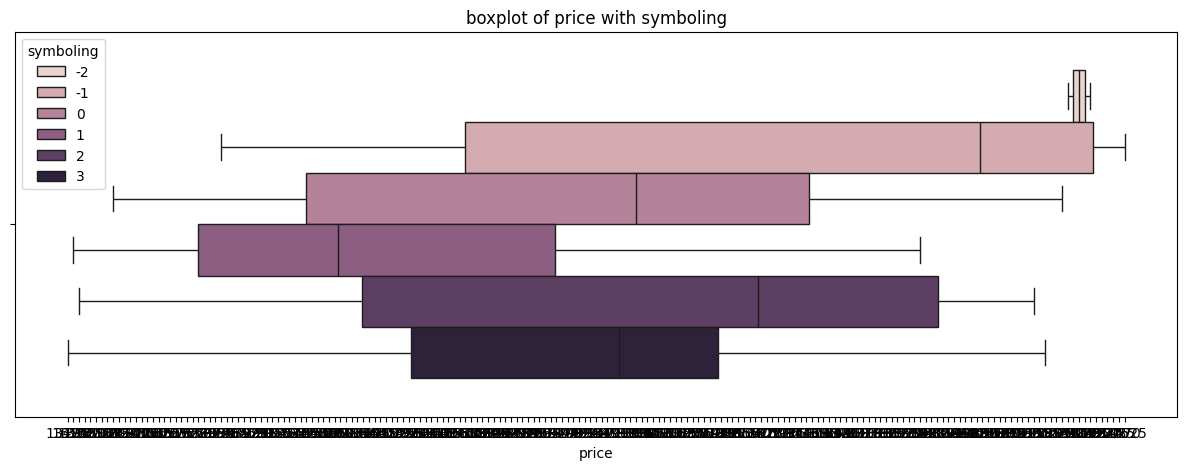

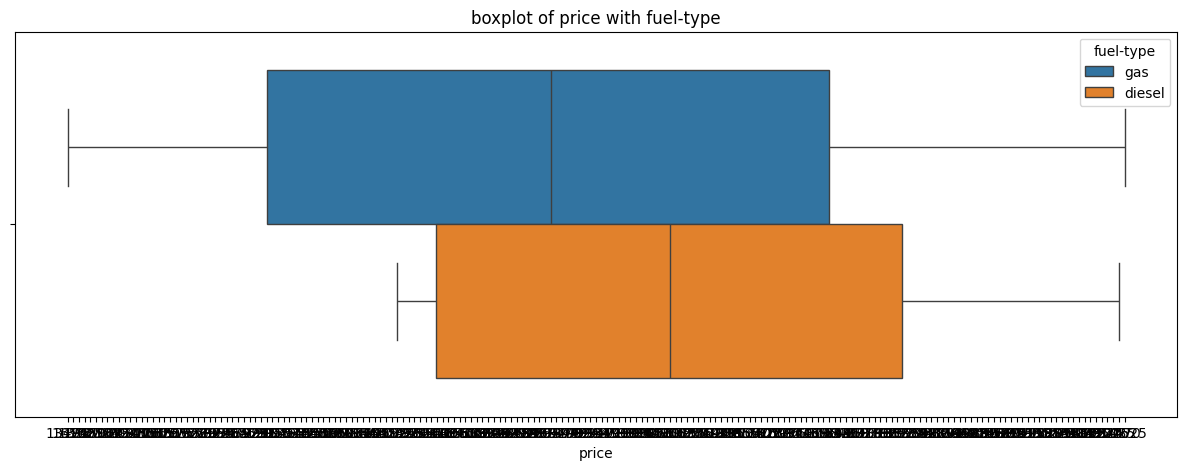

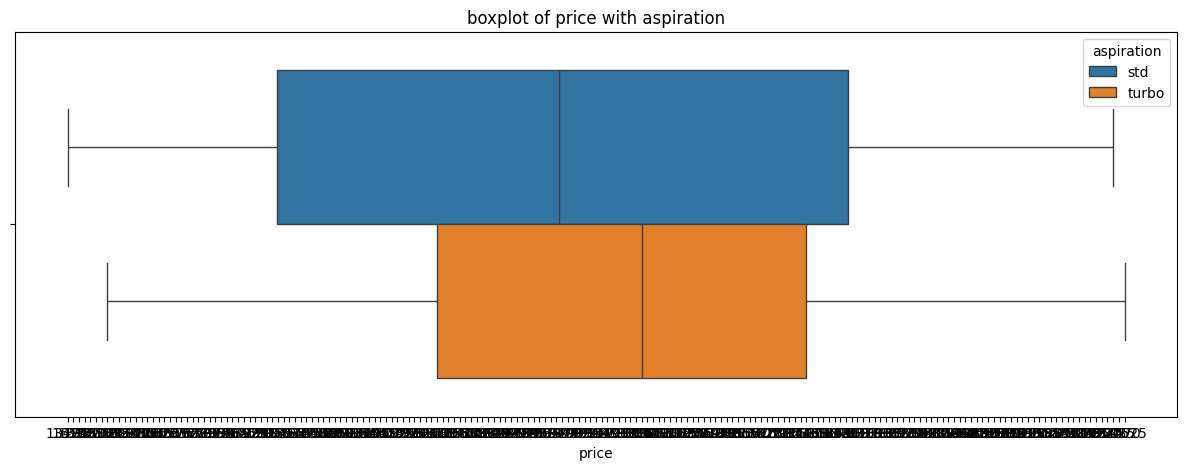

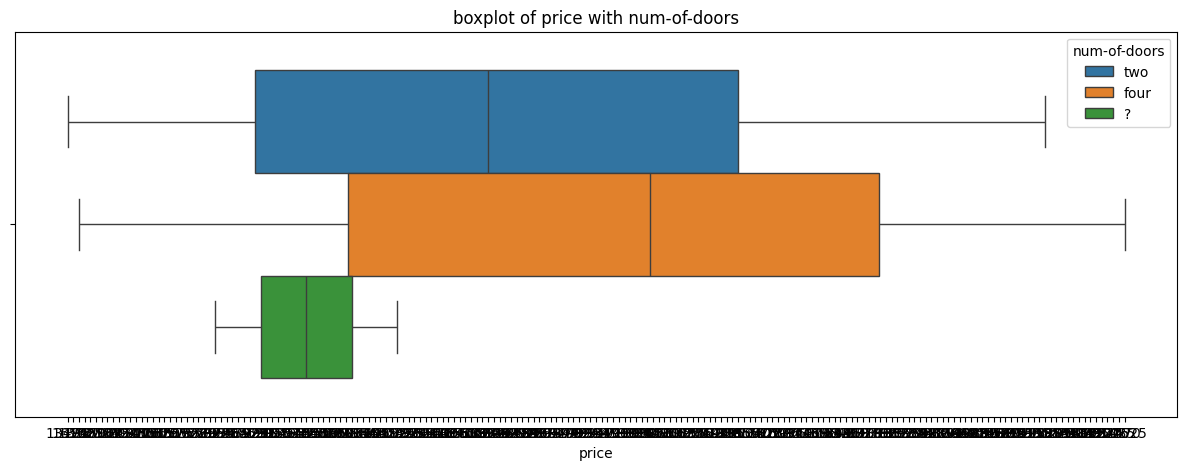

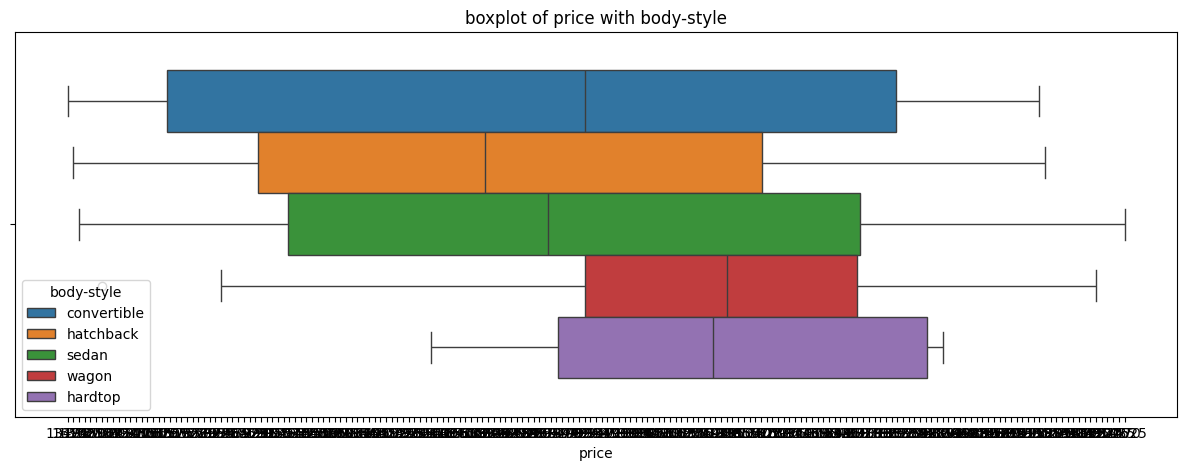

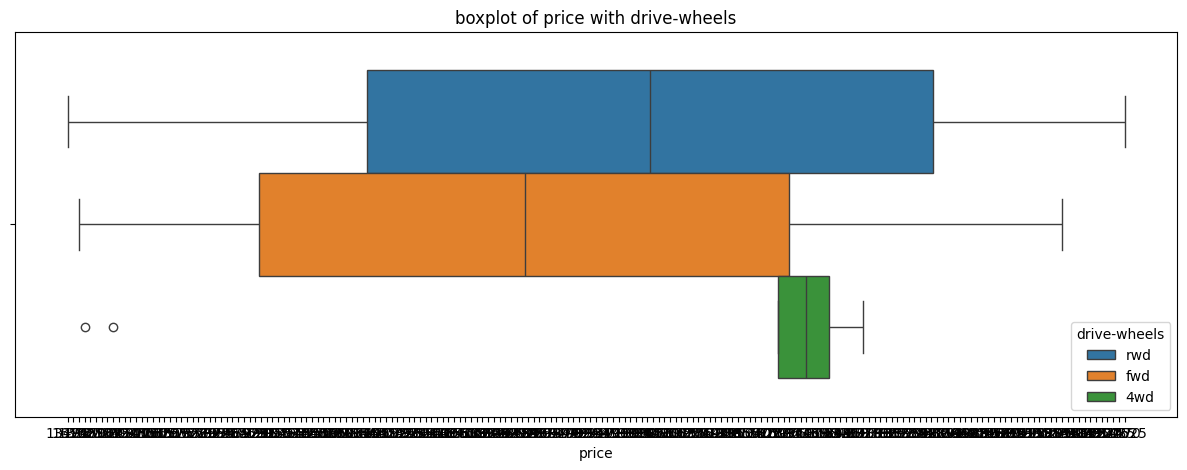

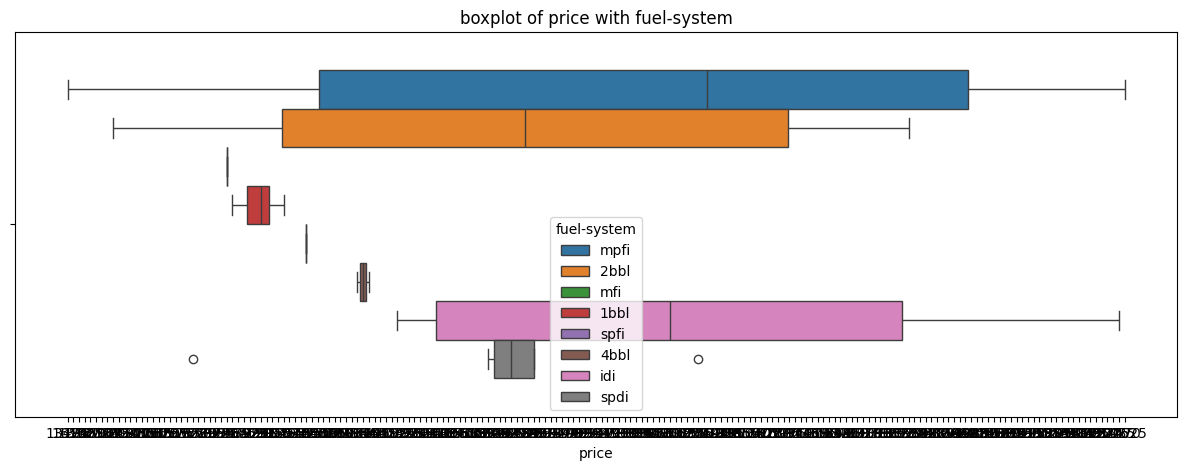

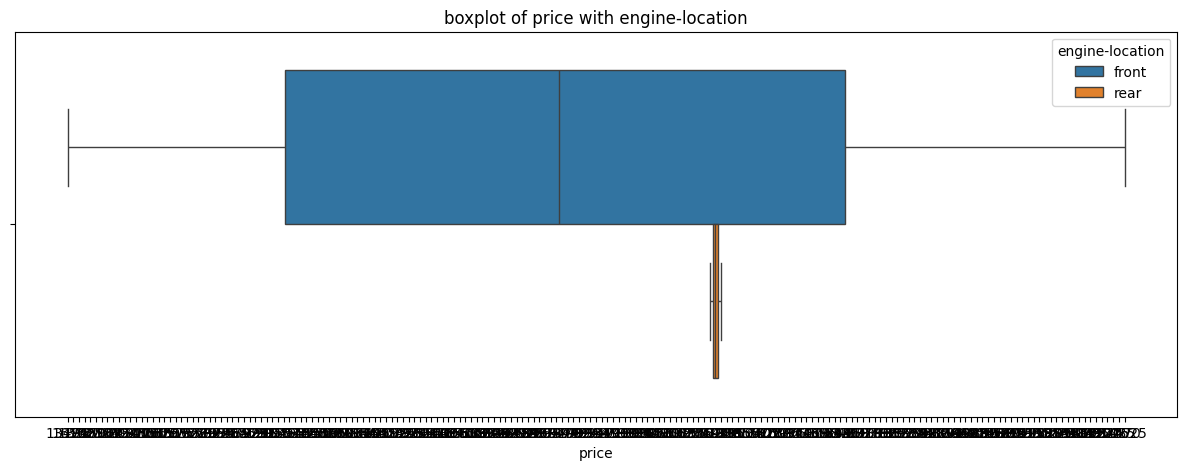

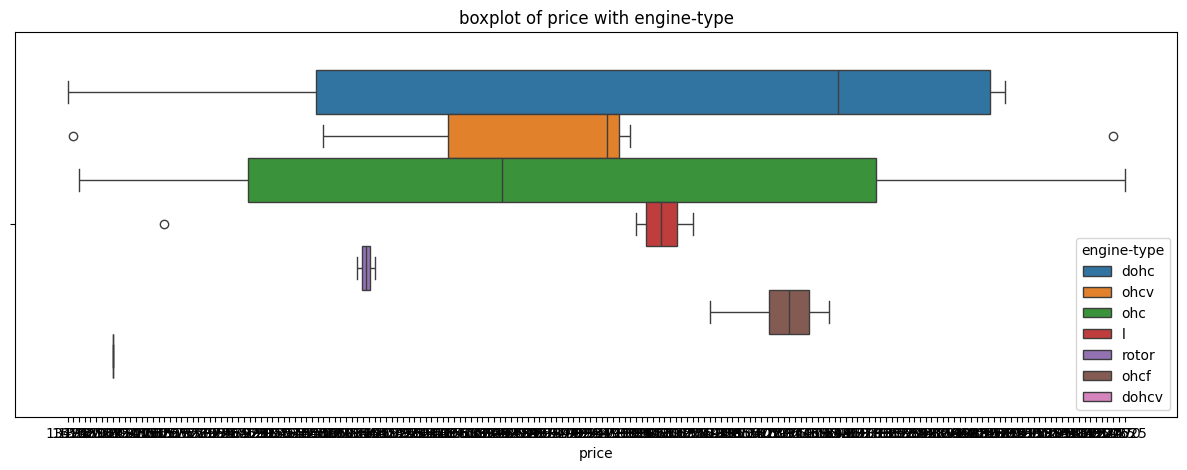

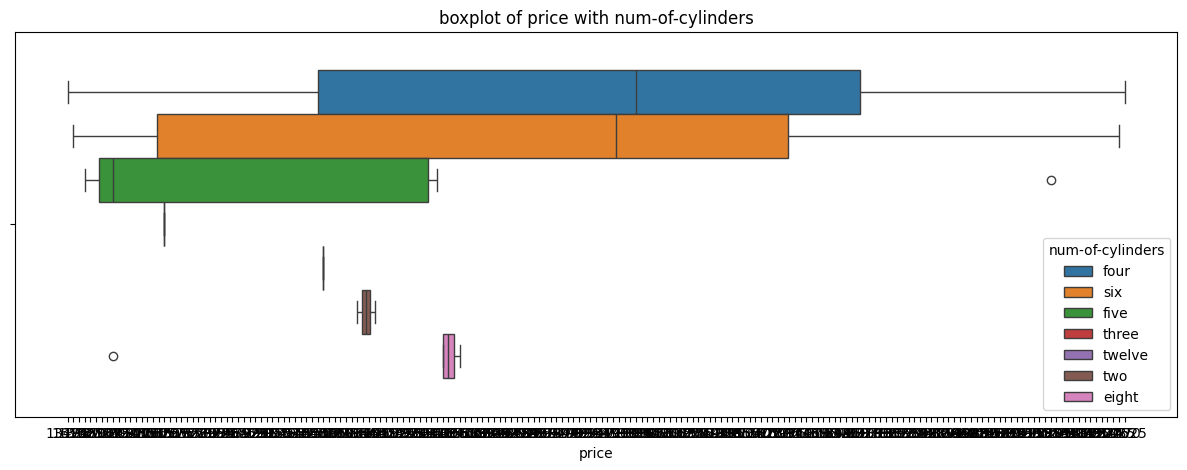

In [13]:
for col in categorical_col:
    plt.figure(figsize=(15,5))
    sns.boxplot(autos_df,x=autos_df['price'], hue=col)
    plt.title(f'boxplot of price with {col}')
    plt.show()

<Figure size 500x500 with 0 Axes>

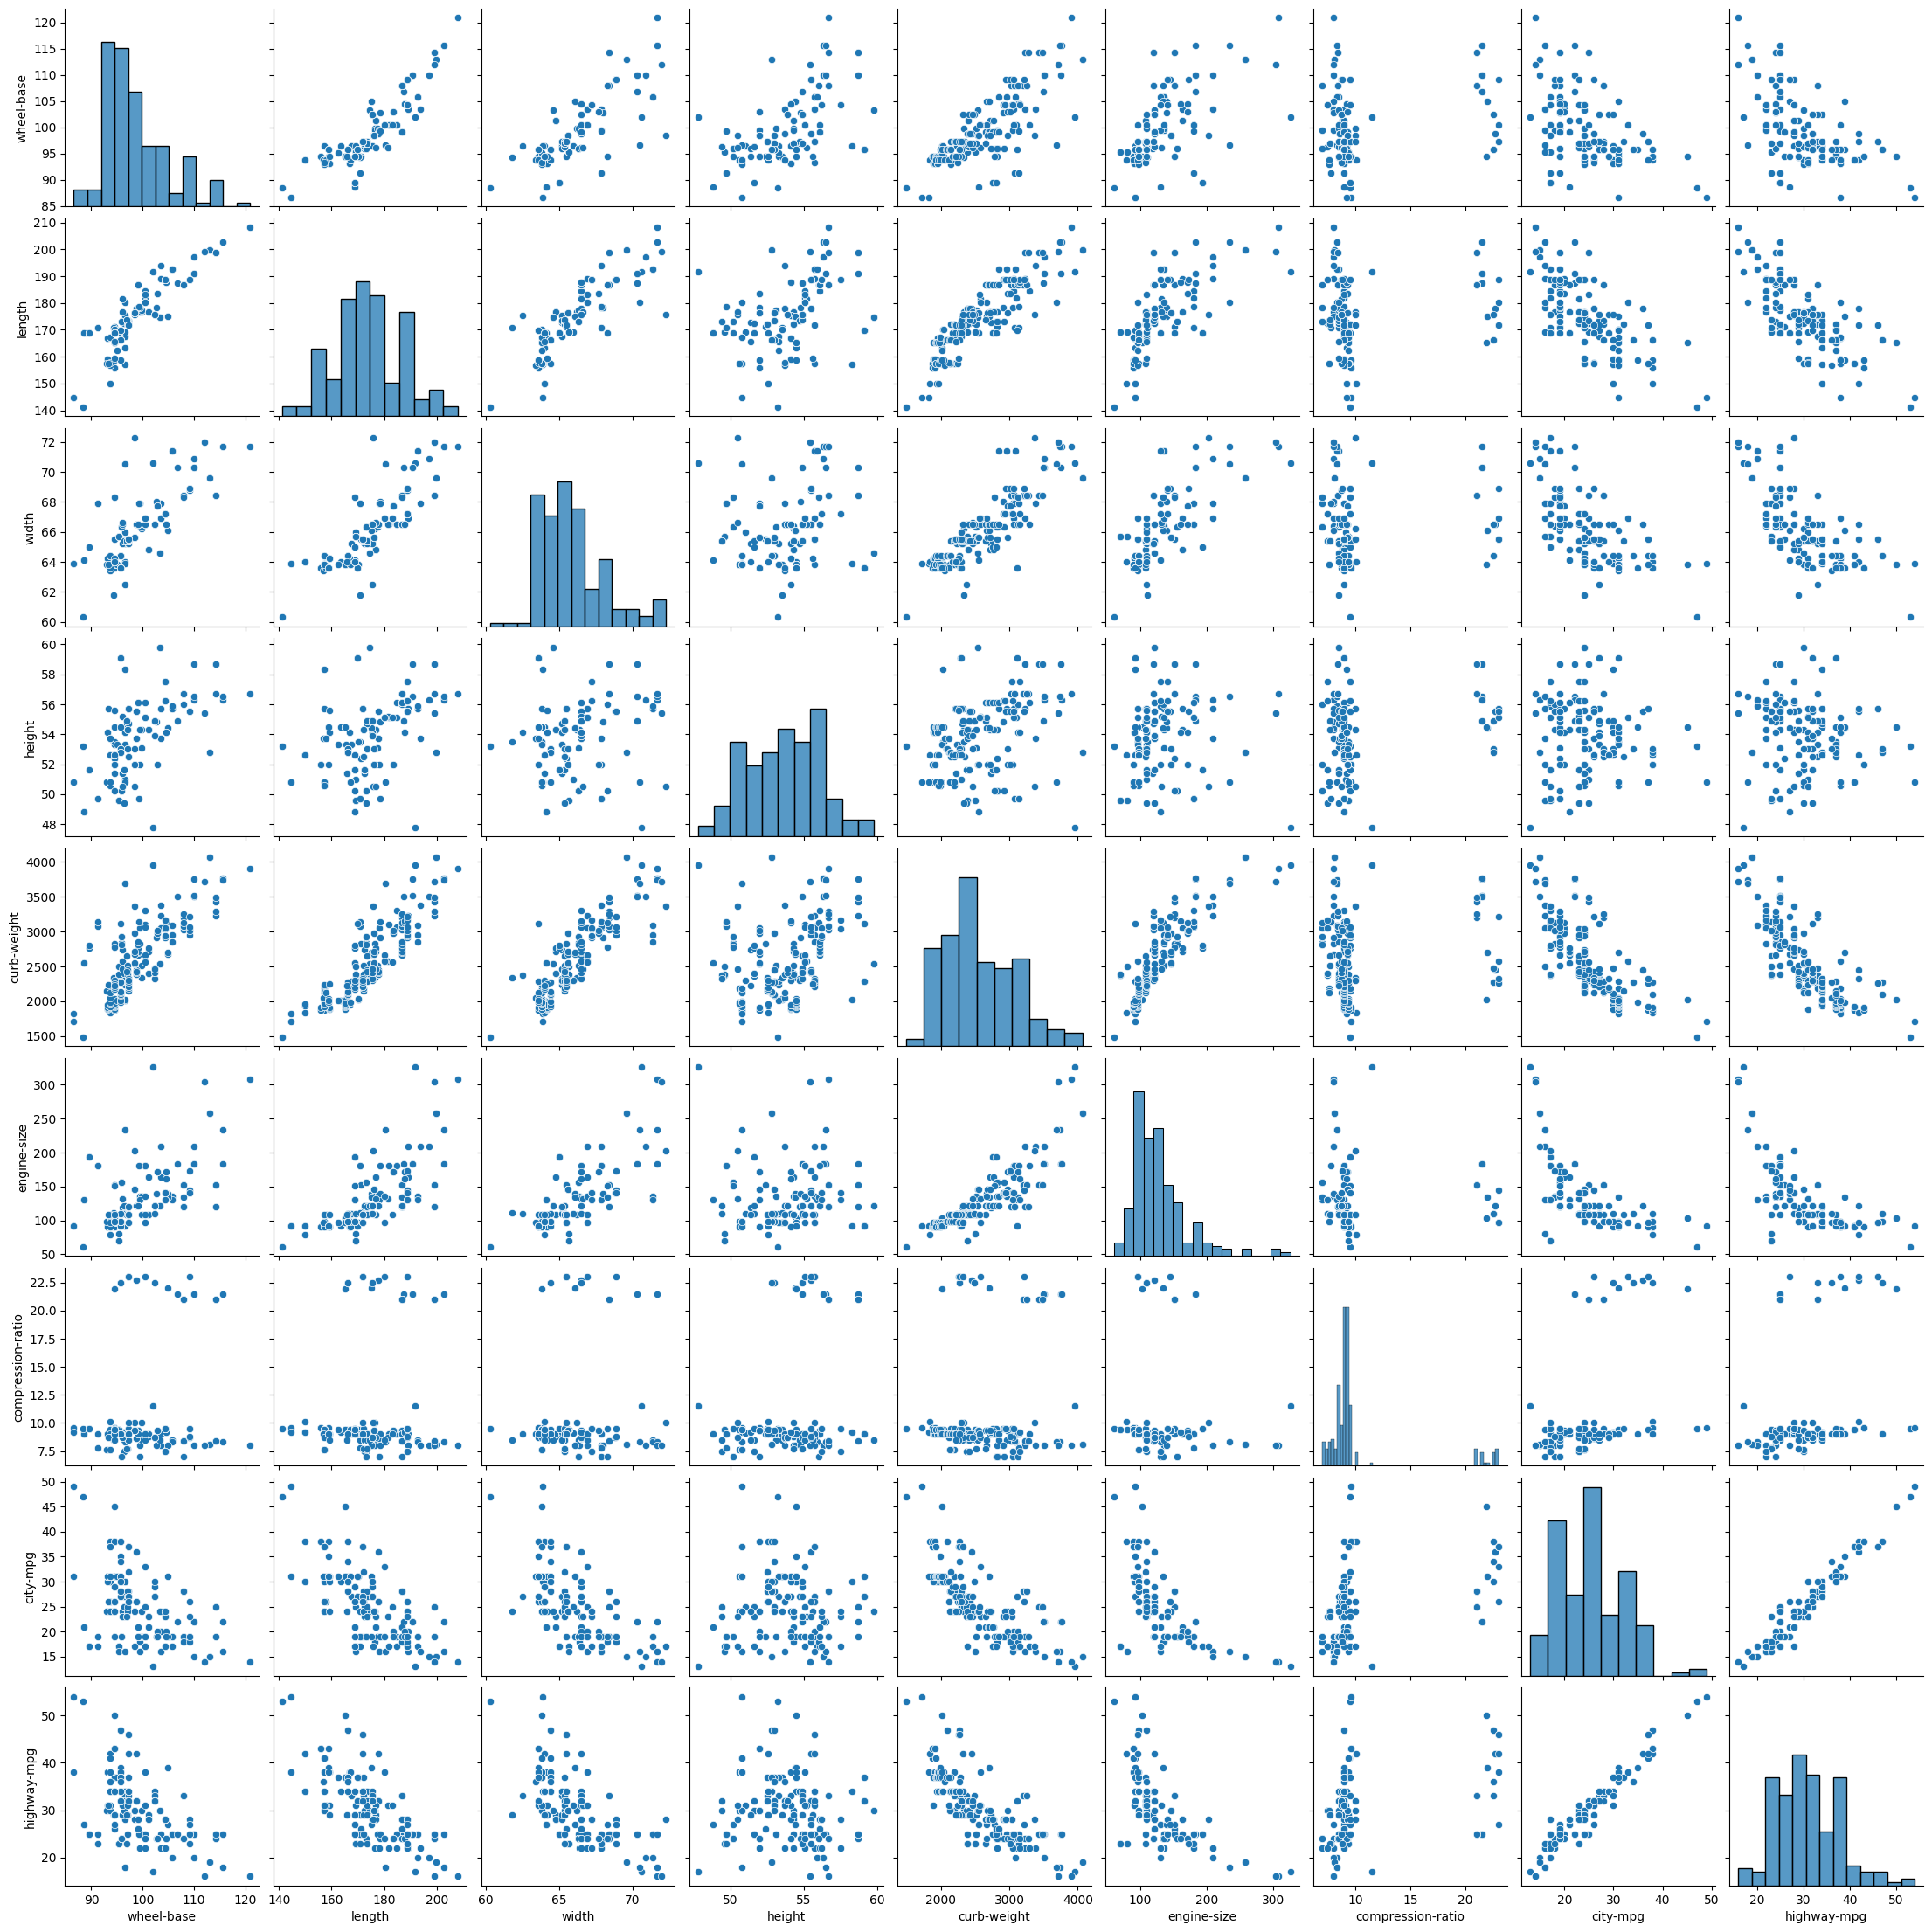

In [14]:
plt.figure(figsize=(5,5))
sns.pairplot(autos_df[numerical_col])
plt.savefig('pairplot_autodf')
plt.show()

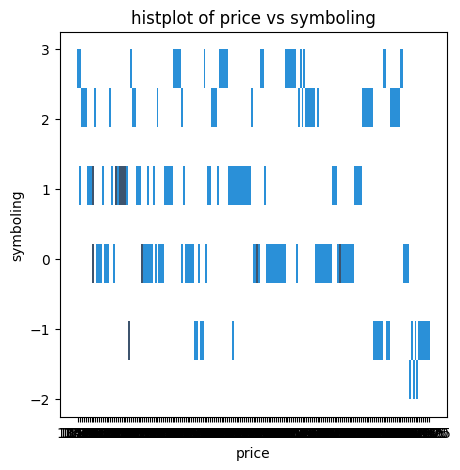

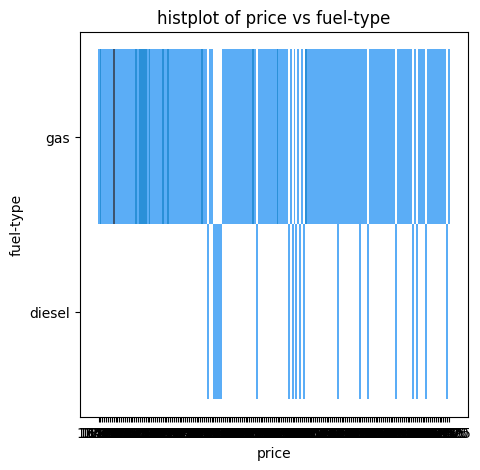

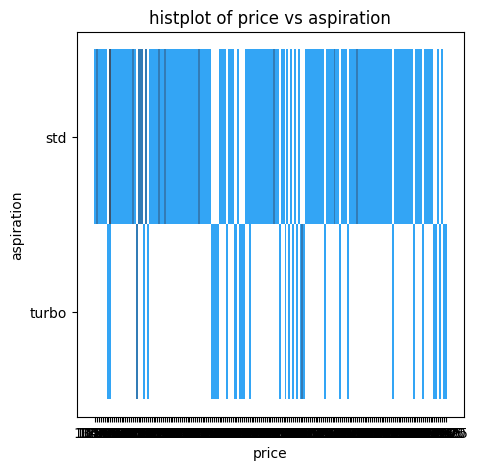

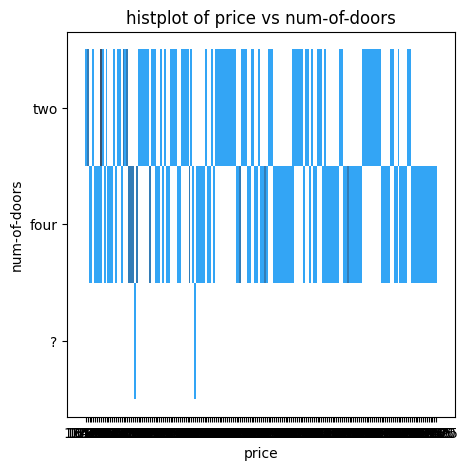

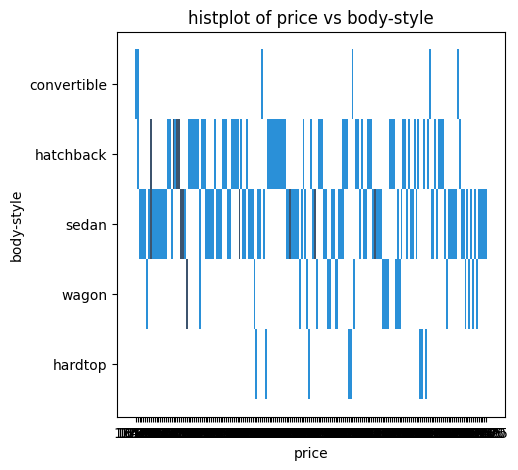

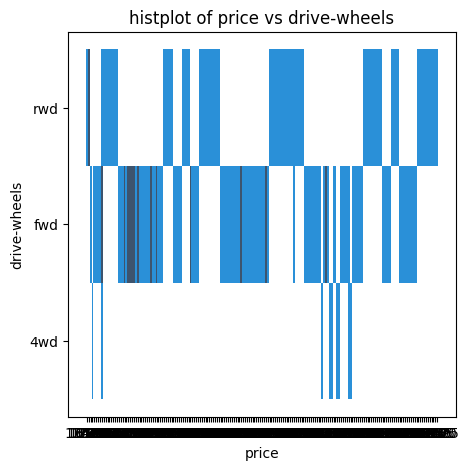

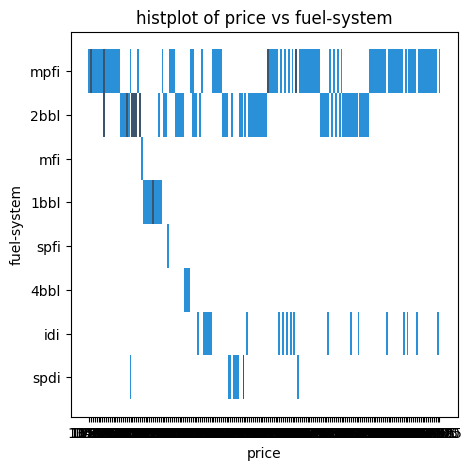

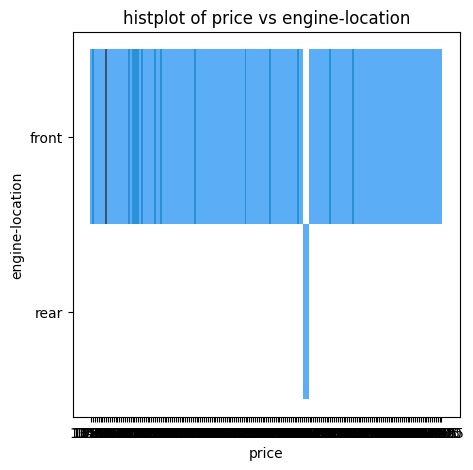

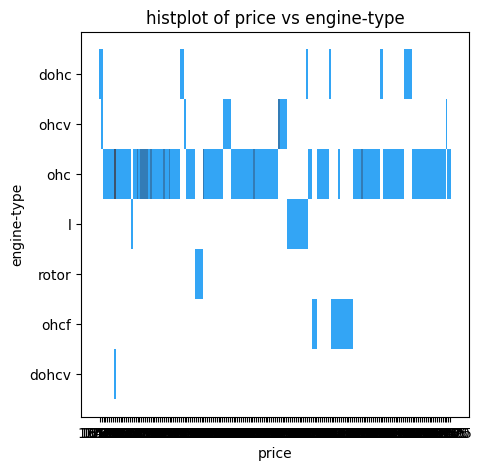

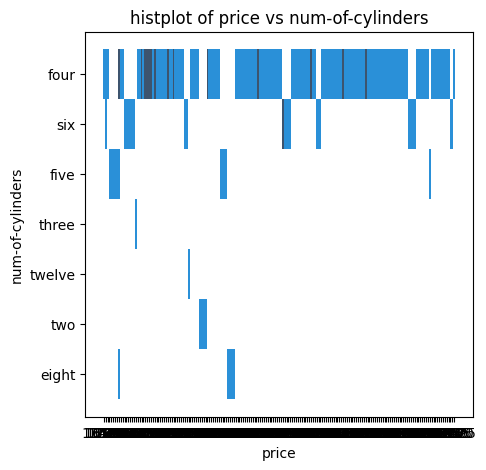

In [15]:
for col in categorical_col:
    plt.figure(figsize=(5,5))
    sns.histplot(autos_df,x='price',y=col)
    plt.title(f'histplot of price vs {col}')
    plt.savefig('histplot of price vs {col}')
    plt.show()
    

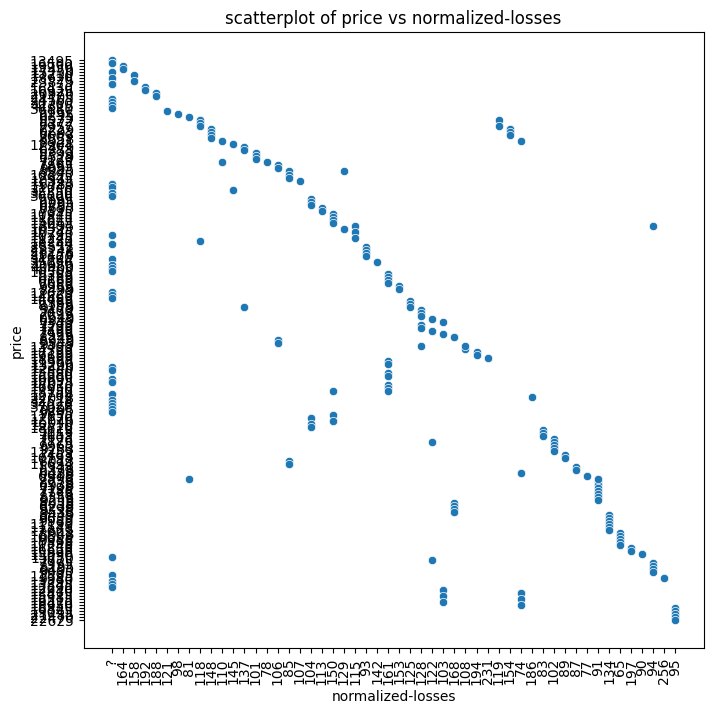

<Figure size 640x480 with 0 Axes>

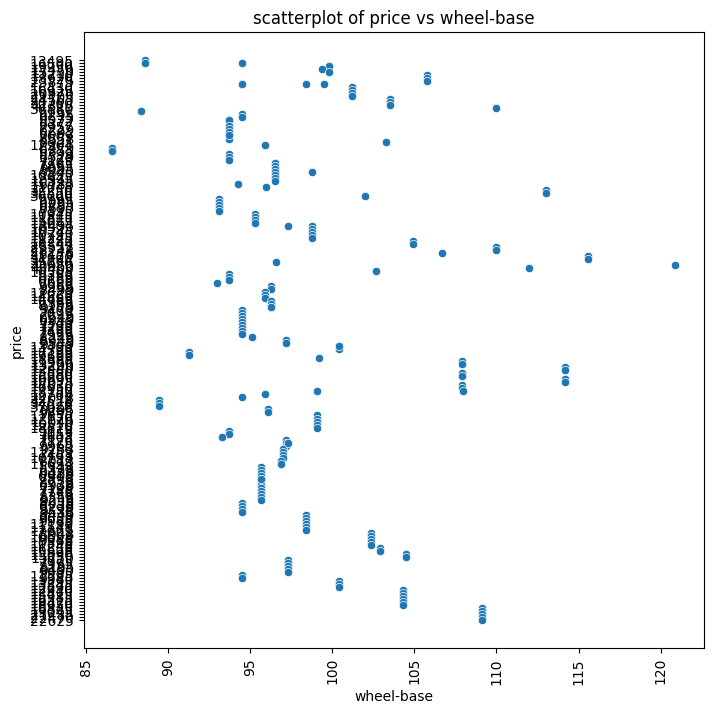

<Figure size 640x480 with 0 Axes>

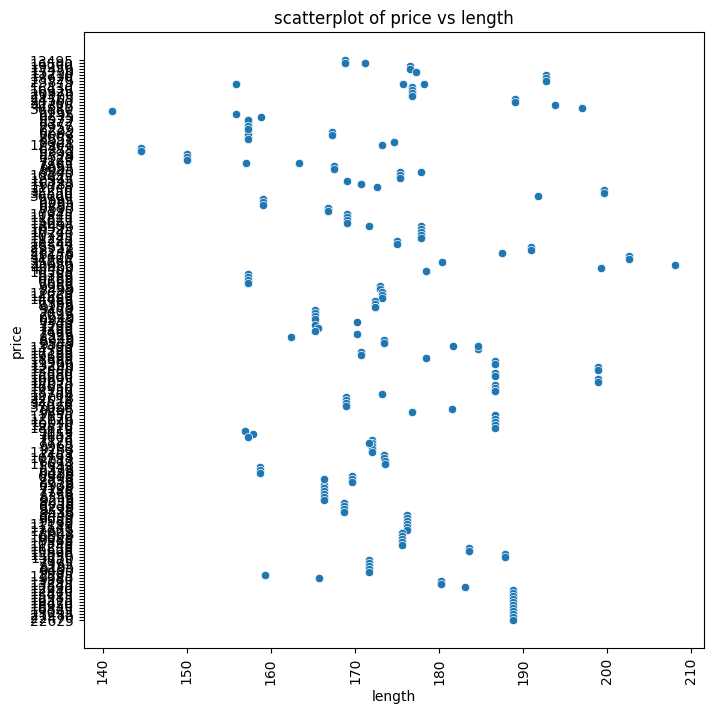

<Figure size 640x480 with 0 Axes>

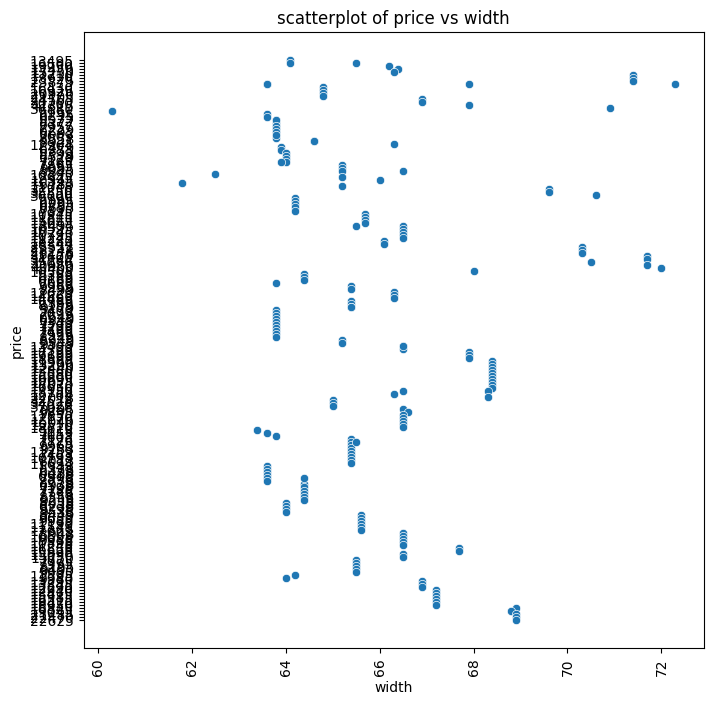

<Figure size 640x480 with 0 Axes>

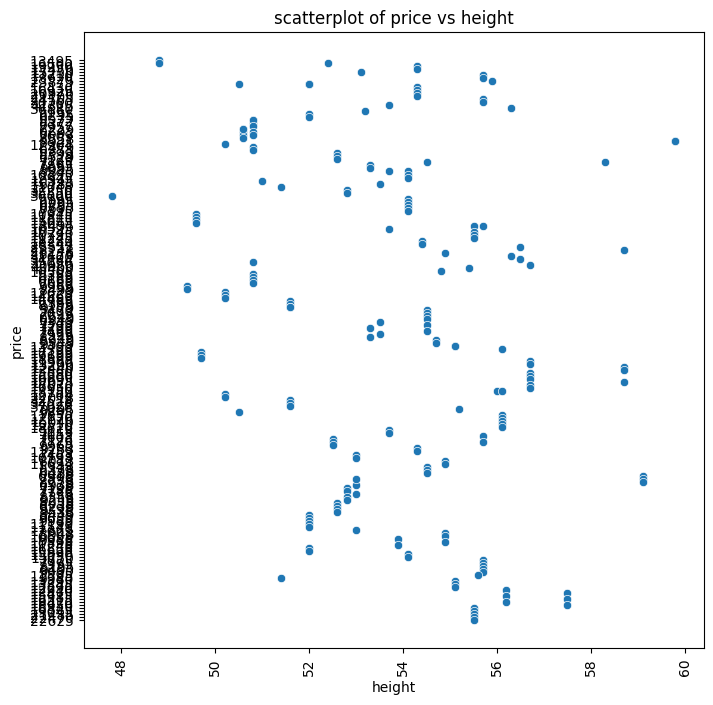

<Figure size 640x480 with 0 Axes>

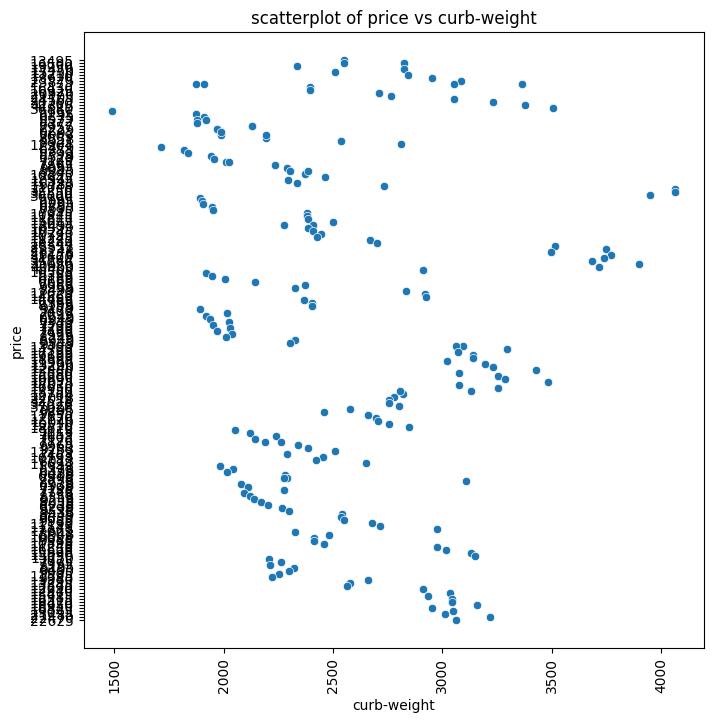

<Figure size 640x480 with 0 Axes>

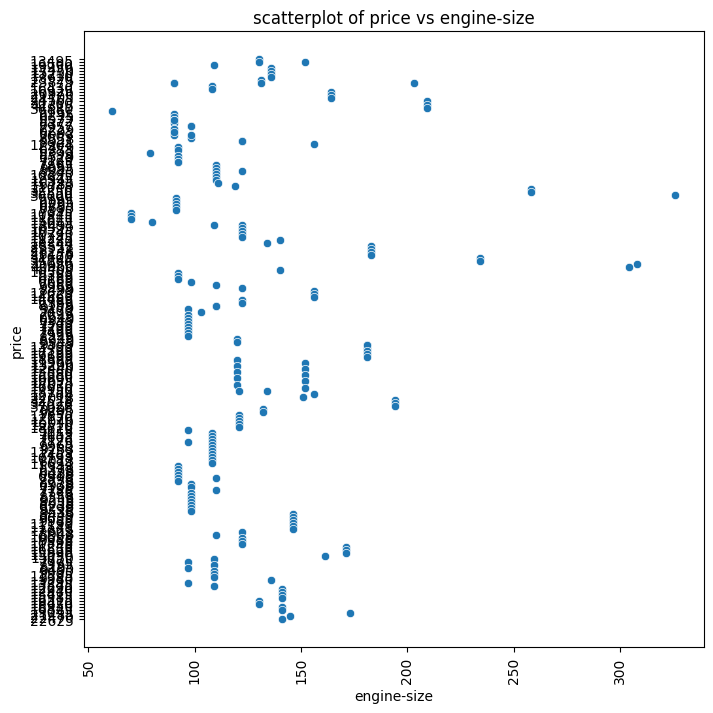

<Figure size 640x480 with 0 Axes>

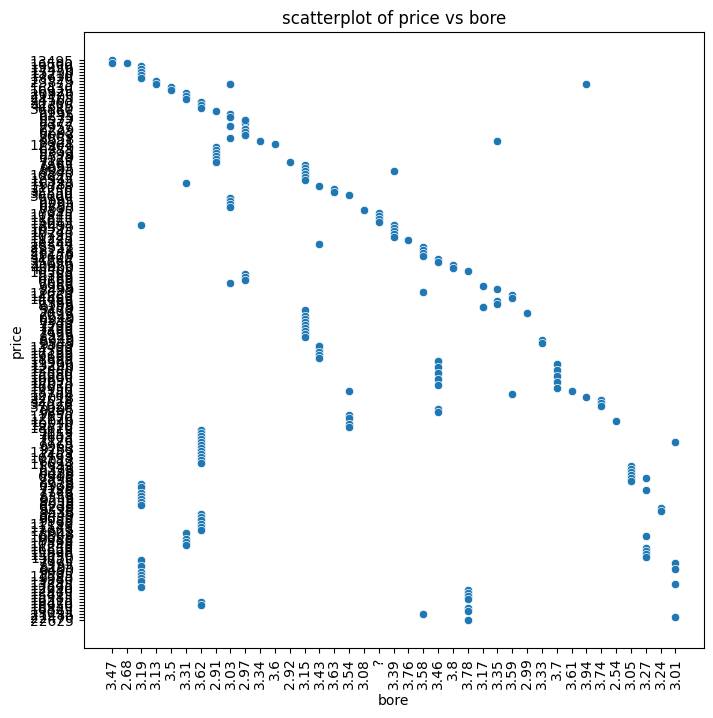

<Figure size 640x480 with 0 Axes>

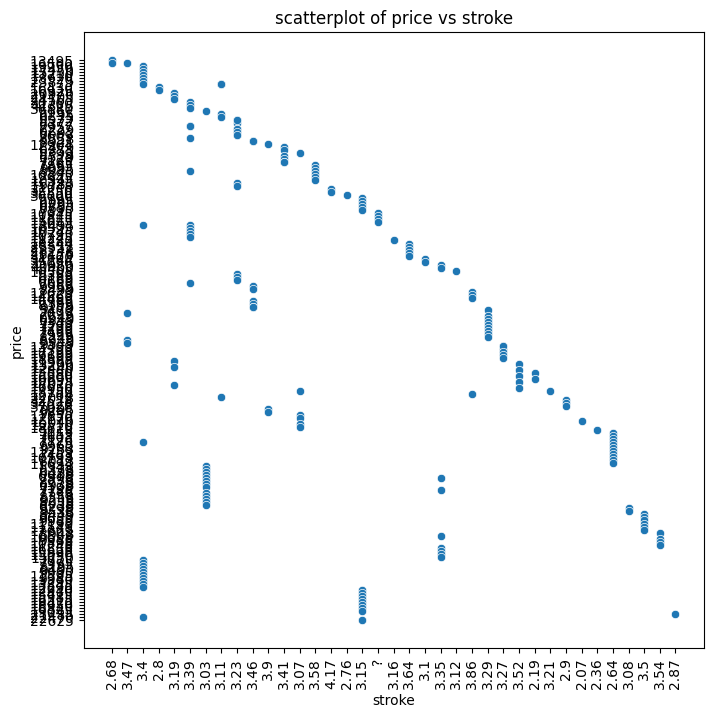

<Figure size 640x480 with 0 Axes>

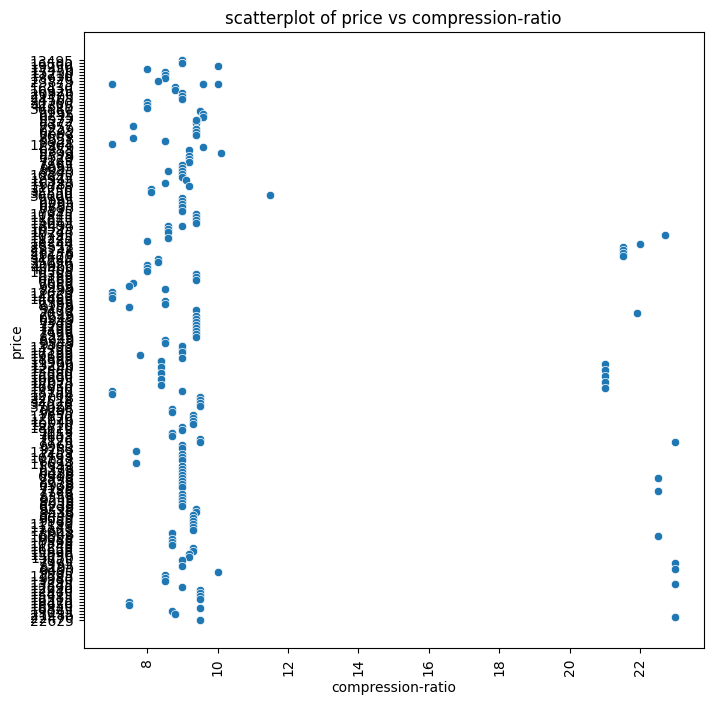

<Figure size 640x480 with 0 Axes>

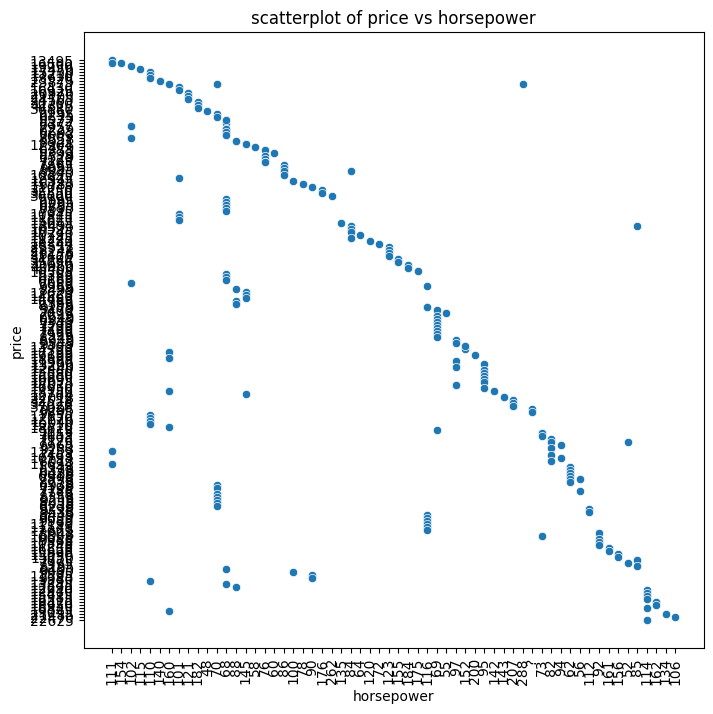

<Figure size 640x480 with 0 Axes>

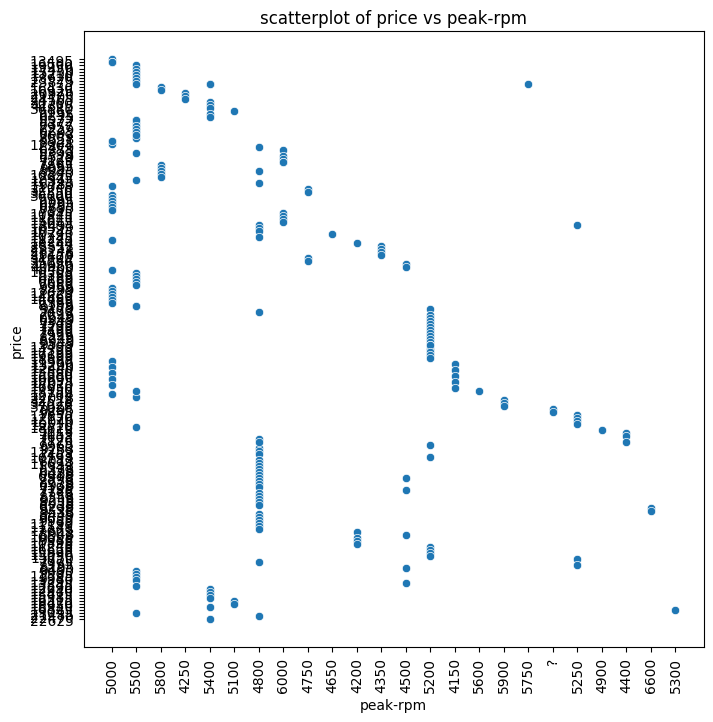

<Figure size 640x480 with 0 Axes>

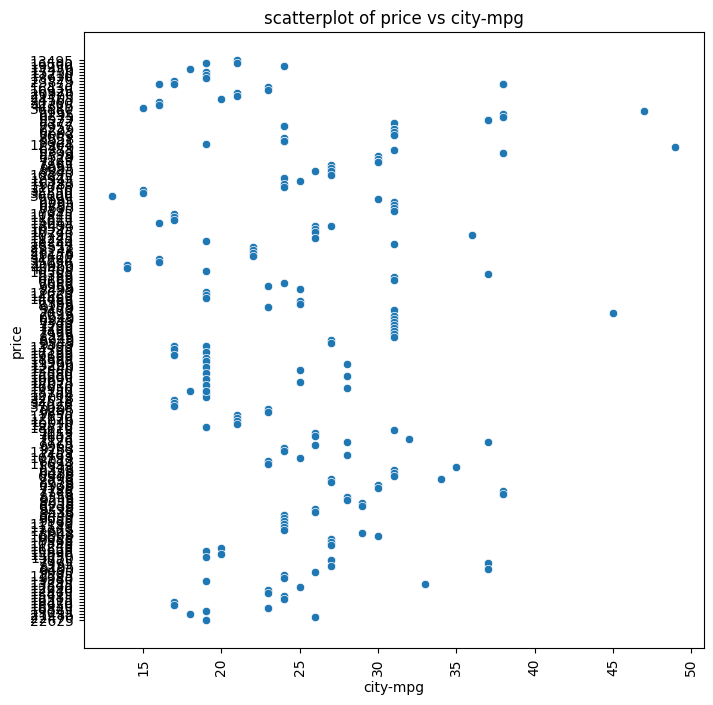

<Figure size 640x480 with 0 Axes>

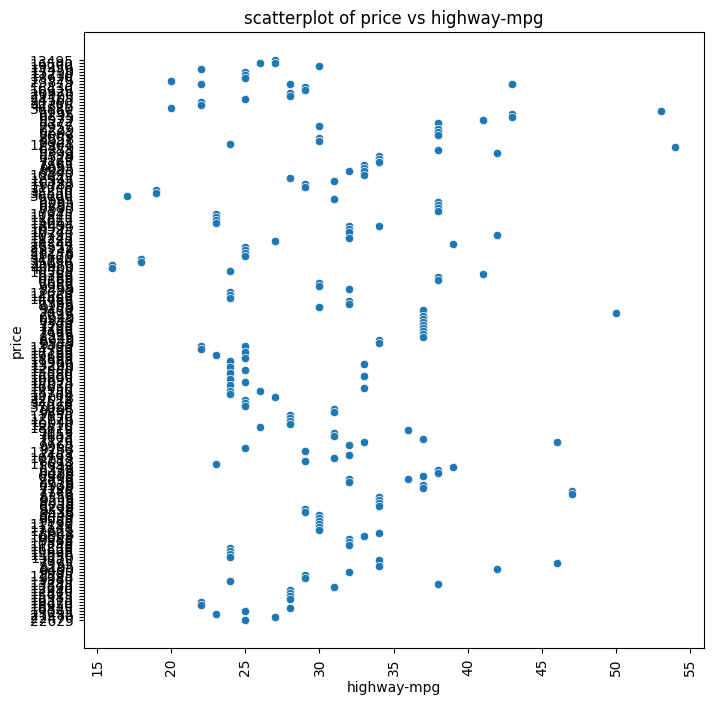

<Figure size 640x480 with 0 Axes>

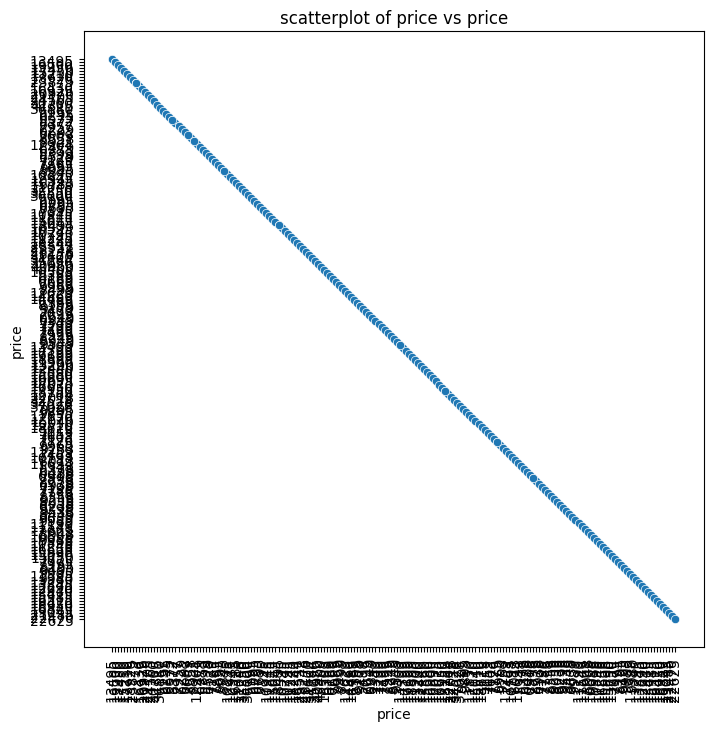

<Figure size 640x480 with 0 Axes>

In [16]:
for col in numerical_col:
    plt.figure(figsize=(8,8))
    sns.scatterplot(autos_df, x=col, y='price')
    plt.xticks(rotation=90) 
    plt.yticks(rotation=0) 
    plt.title(f'scatterplot of price vs {col}')
    plt.show()
    plt.savefig(f'scatterplot of price vs {col}')

In [17]:
col_with_miss_val=pd.Series(np.where(autos_df=='?')[1]).unique()
df_with_miss_val=autos_df.iloc[:,col_with_miss_val]
df_with_miss_val

normalized-losses  price num-of-doors  bore stroke horsepower peak-rpm
0                   ?  13495          two  3.47   2.68        111     5000
1                   ?  16500          two  3.47   2.68        111     5000
2                   ?  16500          two  2.68   3.47        154     5000
3                 164  13950         four  3.19    3.4        102     5500
4                 164  17450         four  3.19    3.4        115     5500
..                ...    ...          ...   ...    ...        ...      ...
200                95  16845         four  3.78   3.15        114     5400
201                95  19045         four  3.78   3.15        160     5300
202                95  21485         four  3.58   2.87        134     5500
203                95  22470         four  3.01    3.4        106     4800
204                95  22625         four  3.78   3.15        114     5400

[205 rows x 7 columns]

In [18]:
df_with_miss_val['num-of-doors'].replace({'?':'two'},inplace=True)


In [19]:
for col in df_with_miss_val:
    print(df_with_miss_val[col].value_counts())
    print()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

price
?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: count, Length: 187, dtype: int64

num-of-doors
four    114
two      91
Name: count, dtype: int64

bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?

In [20]:
df_with_miss_val.drop('num-of-doors',axis=1, inplace=True)

In [21]:
df_with_miss_val.describe()

normalized-losses price  bore stroke horsepower peak-rpm
count                205   205   205    205        205      205
unique                52   187    39     37         60       24
top                    ?     ?  3.62    3.4         68     5500
freq                  41     4    23     20         19       37

In [22]:
array1=np.where(df_with_miss_val=='?',np.nan,df_with_miss_val)
nan_repla_df=pd.DataFrame(array1,columns=df_with_miss_val.columns)
nan_repla_df

normalized-losses  price  bore stroke horsepower peak-rpm
0                 NaN  13495  3.47   2.68        111     5000
1                 NaN  16500  3.47   2.68        111     5000
2                 NaN  16500  2.68   3.47        154     5000
3                 164  13950  3.19    3.4        102     5500
4                 164  17450  3.19    3.4        115     5500
..                ...    ...   ...    ...        ...      ...
200                95  16845  3.78   3.15        114     5400
201                95  19045  3.78   3.15        160     5300
202                95  21485  3.58   2.87        134     5500
203                95  22470  3.01    3.4        106     4800
204                95  22625  3.78   3.15        114     5400

[205 rows x 6 columns]

In [23]:
knn_imputer = KNNImputer(n_neighbors = 3)
array2= knn_imputer.fit_transform(nan_repla_df)
immputed_df = pd.DataFrame(array2,columns = df_with_miss_val.columns)
immputed_df

normalized-losses    price  bore  stroke  horsepower  peak-rpm
0           103.333333  13495.0  3.47    2.68       111.0    5000.0
1           144.000000  16500.0  3.47    2.68       111.0    5000.0
2           144.000000  16500.0  2.68    3.47       154.0    5000.0
3           164.000000  13950.0  3.19    3.40       102.0    5500.0
4           164.000000  17450.0  3.19    3.40       115.0    5500.0
..                 ...      ...   ...     ...         ...       ...
200          95.000000  16845.0  3.78    3.15       114.0    5400.0
201          95.000000  19045.0  3.78    3.15       160.0    5300.0
202          95.000000  21485.0  3.58    2.87       134.0    5500.0
203          95.000000  22470.0  3.01    3.40       106.0    4800.0
204          95.000000  22625.0  3.78    3.15       114.0    5400.0

[205 rows x 6 columns]

In [24]:
immputed_df.columns

Index(['normalized-losses', 'price', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

In [25]:
autos_df[immputed_df.columns]=immputed_df

In [26]:
autos_df

symboling  normalized-losses fuel-type aspiration num-of-doors  \
0            3         103.333333       gas        std          two   
1            3         144.000000       gas        std          two   
2            1         144.000000       gas        std          two   
3            2         164.000000       gas        std         four   
4            2         164.000000       gas        std         four   
..         ...                ...       ...        ...          ...   
200         -1          95.000000       gas        std         four   
201         -1          95.000000       gas      turbo         four   
202         -1          95.000000       gas        std         four   
203         -1          95.000000    diesel      turbo         four   
204         -1          95.000000       gas      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front        88.6   168.8  ...   
1    convertible          rwd           front        88.6   168.8  ...   
2      hatchback          rwd           front        94.5   171.2  ...   
3          sedan          fwd           front        99.8   176.6  ...   
4          sedan          4wd           front        99.4   176.6  ...   
..           ...          ...             ...         ...     ...  ...   
200        sedan          rwd           front       109.1   188.8  ...   
201        sedan          rwd           front       109.1   188.8  ...   
202        sedan          rwd           front       109.1   188.8  ...   
203        sedan          rwd           front       109.1   188.8  ...   
204        sedan          rwd           front       109.1   188.8  ...   

     engine-size  fuel-system  bore stroke compression-ratio  horsepower  \
0            130         mpfi  3.47   2.68               9.0       111.0   
1            130         mpfi  3.47   2.68               9.0       111.0   
2            152         mpfi  2.68   3.47               9.0       154.0   
3            109         mpfi  3.19   3.40              10.0       102.0   
4            136         mpfi  3.19   3.40               8.0       115.0   
..           ...          ...   ...    ...               ...         ...   
200          141         mpfi  3.78   3.15               9.5       114.0   
201          141         mpfi  3.78   3.15               8.7       160.0   
202          173         mpfi  3.58   2.87               8.8       134.0   
203          145          idi  3.01   3.40              23.0       106.0   
204          141         mpfi  3.78   3.15               9.5       114.0   

    peak-rpm  city-mpg  highway-mpg    price  
0     5000.0        21           27  13495.0  
1     5000.0        21           27  16500.0  
2     5000.0        19           26  16500.0  
3     5500.0        24           30  13950.0  
4     5500.0        18           22  17450.0  
..       ...       ...          ...      ...  
200   5400.0        23           28  16845.0  
201   5300.0        19           25  19045.0  
202   5500.0        18           23  21485.0  
203   4800.0        26           27  22470.0  
204   5400.0        19           25  22625.0  

[205 rows x 25 columns]

In [27]:
ordinal_cols=['symboling','num-of-cylinders']
autos_df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [28]:
# by analysing the pie chart of num of cylinder and histplot of price vs num of cylinder 
autos_df['num-of-cylinders'].replace({'four':3, 'six':2, 'five':1, 'eight':0, 'two':0, 'three':0, 'twelve':0},inplace= True)

In [29]:
autos_df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [30]:
nominal_cols=['fuel-type', 'aspiration','num-of-doors','body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

In [31]:
autos_df = pd.get_dummies(autos_df, columns= nominal_cols, drop_first=True, dtype=int)
autos_df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'fuel-type_gas', 'aspiration_turbo',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [32]:
autos_df

symboling  normalized-losses  wheel-base  length  width  height  \
0            3         103.333333        88.6   168.8   64.1    48.8   
1            3         144.000000        88.6   168.8   64.1    48.8   
2            1         144.000000        94.5   171.2   65.5    52.4   
3            2         164.000000        99.8   176.6   66.2    54.3   
4            2         164.000000        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
200         -1          95.000000       109.1   188.8   68.9    55.5   
201         -1          95.000000       109.1   188.8   68.8    55.5   
202         -1          95.000000       109.1   188.8   68.9    55.5   
203         -1          95.000000       109.1   188.8   68.9    55.5   
204         -1          95.000000       109.1   188.8   68.9    55.5   

     curb-weight  num-of-cylinders  engine-size  bore  ...  engine-type_ohcf  \
0           2548                 3          130  3.47  ...                 0   
1           2548                 3          130  3.47  ...                 0   
2           2823                 2          152  2.68  ...                 0   
3           2337                 3          109  3.19  ...                 0   
4           2824                 1          136  3.19  ...                 0   
..           ...               ...          ...   ...  ...               ...   
200         2952                 3          141  3.78  ...                 0   
201         3049                 3          141  3.78  ...                 0   
202         3012                 2          173  3.58  ...                 0   
203         3217                 2          145  3.01  ...                 0   
204         3062                 3          141  3.78  ...                 0   

     engine-type_ohcv  engine-type_rotor  fuel-system_2bbl  fuel-system_4bbl  \
0                   0                  0                 0                 0   
1                   0                  0                 0                 0   
2                   1                  0                 0                 0   
3                   0                  0                 0                 0   
4                   0                  0                 0                 0   
..                ...                ...               ...               ...   
200                 0                  0                 0                 0   
201                 0                  0                 0                 0   
202                 1                  0                 0                 0   
203                 0                  0                 0                 0   
204                 0                  0                 0                 0   

     fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  \
0                  0                0                 1                 0   
1                  0                0                 1                 0   
2                  0                0                 1                 0   
3                  0                0                 1                 0   
4                  0                0                 1                 0   
..               ...              ...               ...               ...   
200                0                0                 1                 0   
201                0                0                 1                 0   
202                0                0                 1                 0   
203                1                0                 0                 0   
204                0                0                 1                 0   

     fuel-system_spfi  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
200                 0  
201                 0  
202                 0  
203                 0  
204                 0  

[205

<Axes: >

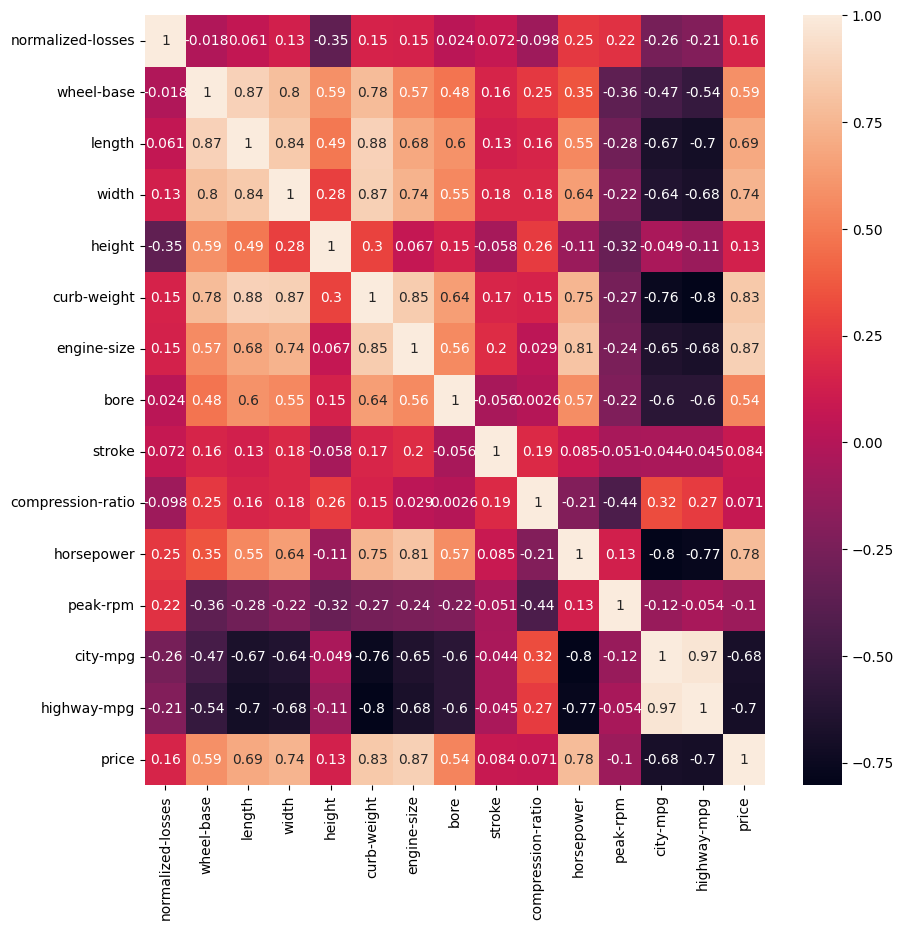

In [33]:
cor=autos_df[numerical_col].corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor , annot=True)

<Axes: >

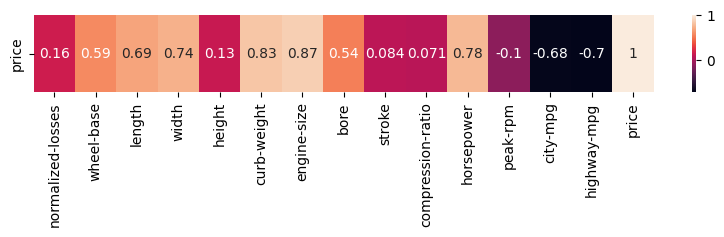

In [34]:
cor=autos_df[numerical_col].corr().tail(1)
plt.figure(figsize=(10,1))
sns.heatmap(cor , annot=True)

In [35]:
numerical_col   = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                   'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                    'peak-rpm', 'city-mpg', 'highway-mpg']

In [36]:
vif_list = [ variance_inflation_factor(autos_df[numerical_col].values, i) for i in range(autos_df[numerical_col].shape[1])]
s1 = pd.Series(vif_list, index = autos_df[numerical_col].columns).sort_values()
s1

compression-ratio      15.762626
normalized-losses      20.000294
horsepower             66.514028
engine-size            69.011047
stroke                125.745623
peak-rpm              224.355659
bore                  281.980937
curb-weight           405.672142
city-mpg              442.513417
highway-mpg           522.121061
height               1013.250370
length               1886.401004
wheel-base           1916.246378
width                2470.531860
dtype: float64

In [37]:
x=autos_df.drop('price', axis=1)
y=autos_df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [86]:
x.head()

symboling  normalized-losses  wheel-base  length  width  height  \
0          3         103.333333        88.6   168.8   64.1    48.8   
1          3         144.000000        88.6   168.8   64.1    48.8   
2          1         144.000000        94.5   171.2   65.5    52.4   
3          2         164.000000        99.8   176.6   66.2    54.3   
4          2         164.000000        99.4   176.6   66.4    54.3   

   curb-weight  num-of-cylinders  engine-size  bore  ...  engine-type_ohcf  \
0         2548                 3          130  3.47  ...                 0   
1         2548                 3          130  3.47  ...                 0   
2         2823                 2          152  2.68  ...                 0   
3         2337                 3          109  3.19  ...                 0   
4         2824                 1          136  3.19  ...                 0   

   engine-type_ohcv  engine-type_rotor  fuel-system_2bbl  fuel-system_4bbl  \
0                 0                  0                 0                 0   
1                 0                  0                 0                 0   
2                 1                  0                 0                 0   
3                 0                  0                 0                 0   
4                 0                  0                 0                 0   

   fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  \
0                0                0                 1                 0   
1                0                0                 1                 0   
2                0                0                 1                 0   
3                0                0                 1                 0   
4                0                0                 1                 0   

   fuel-system_spfi  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 40 columns]

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg

LinearRegression()

In [39]:
class ModelEvaluation():
    def __init__(self, x_train, x_test):
        self.x_train = x_train
        self.x_test  = x_test
        
    def evaluation(self, estimator, y_train, y_test):
        
        print('Evaluation on training data\n'.upper())
        y_pred_train = estimator.predict(self.x_train)

        mse = mean_squared_error(y_train, y_pred_train)
        print("MSE :",mse)
        
        rmse = np.sqrt(mse)
        print("RMSE:",rmse)
        
        mae = mean_absolute_error(y_train, y_pred_train)
        print("MAE :", mae)
        
        r_squared = r2_score(y_train, y_pred_train)
        print("R-Squared :",r_squared)
        print('-'*50+'\n')
        
        print('Evaluation on testing data\n'.upper())
        y_pred = estimator.predict(self.x_test)
        
        mse = mean_squared_error(y_test, y_pred)
        print("MSE :",mse)
        
        rmse = np.sqrt(mse)
        print("RMSE:",rmse)
        
        mae = mean_absolute_error(y_test, y_pred)
        print("MAE :", mae)
        
        r_squared = r2_score(y_test, y_pred)
        print("R-Squared :",r_squared)

In [40]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(lin_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 3582025.087814384
RMSE: 1892.6238632687648
MAE : 1394.6019458151015
R-Squared : 0.9404626694485495
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 12098148.800456306
RMSE: 3478.239324781477
MAE : 2187.0263900544933
R-Squared : 0.8205501586621939


In [41]:
slopes=np.around(lin_reg.coef_,3)
intercept=lin_reg.intercept_
print(slopes)
print(intercept)

[ 4.3813700e+02  1.1532000e+01  1.6219600e+02 -1.3064800e+02
  9.6598500e+02  2.8242200e+02  2.6290000e+00  1.2887000e+01
  1.5382800e+02 -3.8592560e+03 -4.2127580e+03 -1.4706660e+03
 -2.8149000e+01  1.3560000e+00  1.6099000e+01  3.9158000e+01
 -9.6634800e+03  1.5231130e+03  1.1645200e+03  4.5641000e+01
 -3.9559420e+03 -3.3245080e+03 -2.1135040e+03 -3.4722090e+03
  2.9607200e+02  2.5057970e+03  1.4395169e+04 -6.3872660e+03
 -5.5773270e+03  1.4733510e+03  7.4689700e+02 -2.8081890e+03
  5.0293210e+03 -4.3403500e+02  5.0293210e+03  9.6634800e+03
 -0.0000000e+00  2.9248400e+02 -2.3020930e+03  4.1636000e+01]
-43702.51909918578


<Axes: >

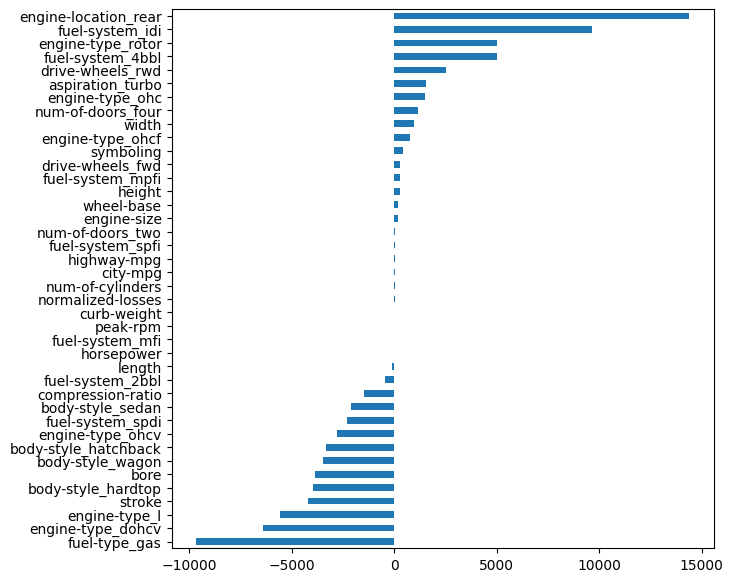

In [42]:
s1 = pd.Series(lin_reg.coef_, index= x.columns)
plt.figure(figsize=(7,7))
s1.sort_values().plot(kind = 'barh')

<Axes: xlabel='price', ylabel='Density'>

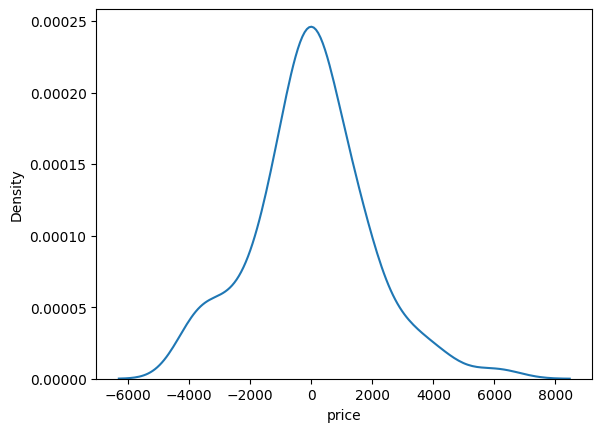

In [43]:
residual = y_train - lin_reg.predict(x_train)
sns.kdeplot(residual)

In [44]:
_, p_val = normaltest(residual)
print('P Value :', p_val)
if p_val >= 0.05:
    print("Data is normally Distributed")

else:
    print("Data is not normally Distributed")


P Value : 0.07403788204818747
Data is normally Distributed


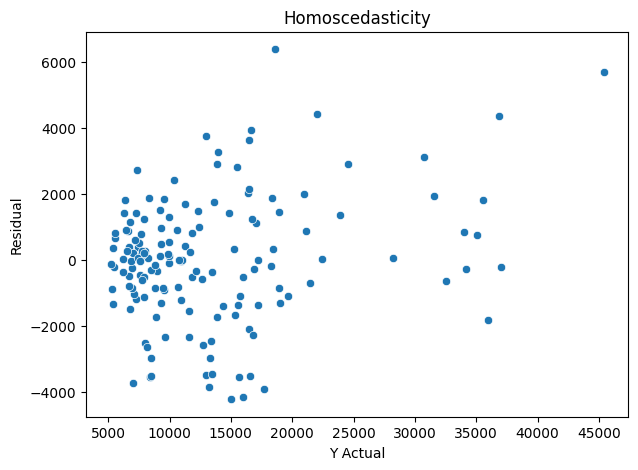

In [45]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = y_train, y = residual)
plt.xlabel("Y Actual")
plt.ylabel("Residual")
plt.title("Homoscedasticity")
plt.savefig('Homoscedasticity.png')

In [46]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=1)

In [47]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(ridge_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 4342616.263920411
RMSE: 2083.8944944311384
MAE : 1589.380739813767
R-Squared : 0.9278207791333783
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 9264642.72200464
RMSE: 3043.7875619045167
MAE : 1890.8935445608552
R-Squared : 0.8625790859463981


In [48]:
ridge_reg = Ridge()
hyp_grid = {"alpha" : np.arange(0.01,2, 0.01)}
gscv_ridge_reg = GridSearchCV(estimator=ridge_reg, param_grid = hyp_grid, cv=4)
gscv_ridge_reg.fit(x_train, y_train)
ridge_reg=gscv_ridge_reg.best_estimator_
ridge_reg

Ridge(alpha=0.09999999999999999)

In [49]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(ridge_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 3632014.1015142608
RMSE: 1905.7843795965641
MAE : 1409.0143553133325
R-Squared : 0.9396317951917736
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 11140235.39701191
RMSE: 3337.699117208127
MAE : 2075.0426435884574
R-Squared : 0.834758729832766


In [50]:
ridge_reg = Ridge()
hyp_grid = {"alpha" : np.arange(2,3 ,0.01)}
gscv_ridge_reg = GridSearchCV(estimator=ridge_reg, param_grid = hyp_grid, cv=4)
gscv_ridge_reg.fit(x_train, y_train)
ridge_reg=gscv_ridge_reg.best_estimator_
ridge_reg

Ridge(alpha=2.0)

In [51]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(ridge_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 4929962.512754321
RMSE: 2220.351889398237
MAE : 1684.5768479234905
R-Squared : 0.9180584165290685
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 8895157.119647335
RMSE: 2982.4749989978686
MAE : 1848.4690697068015
R-Squared : 0.8680596048103355


In [52]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1)

In [53]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(lasso_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 3585720.649734391
RMSE: 1893.5999180751965
MAE : 1394.7361967056188
R-Squared : 0.9404012450067294
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 10994260.828109138
RMSE: 3315.7594647545134
MAE : 2078.1707878336965
R-Squared : 0.8369239464837605


In [54]:
lasso_reg = Lasso()
hyp_grid = {"alpha" : np.arange(0.01,3, 0.01)}
gscv_lasso_reg = GridSearchCV(estimator=lasso_reg, param_grid = hyp_grid, cv=6)
gscv_lasso_reg.fit(x_train, y_train)
lasso_reg=gscv_lasso_reg.best_estimator_

In [55]:
lasso_reg

Lasso(alpha=0.9500000000000001)

In [56]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(lasso_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 3585361.617831036
RMSE: 1893.505114287003
MAE : 1394.7003002139477
R-Squared : 0.9404072125252656
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 11001688.16811207
RMSE: 3316.8792815102674
MAE : 2078.986098609734
R-Squared : 0.8368137779772334


In [57]:
dt_reg = DecisionTreeRegressor(random_state = 1)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [58]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(dt_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 20109.114379084967
RMSE: 141.8066090811178
MAE : 27.235294117647058
R-Squared : 0.9996657636503001
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 5534714.854700854
RMSE: 2352.597469755686
MAE : 1576.6410256410256
R-Squared : 0.9179044894464675


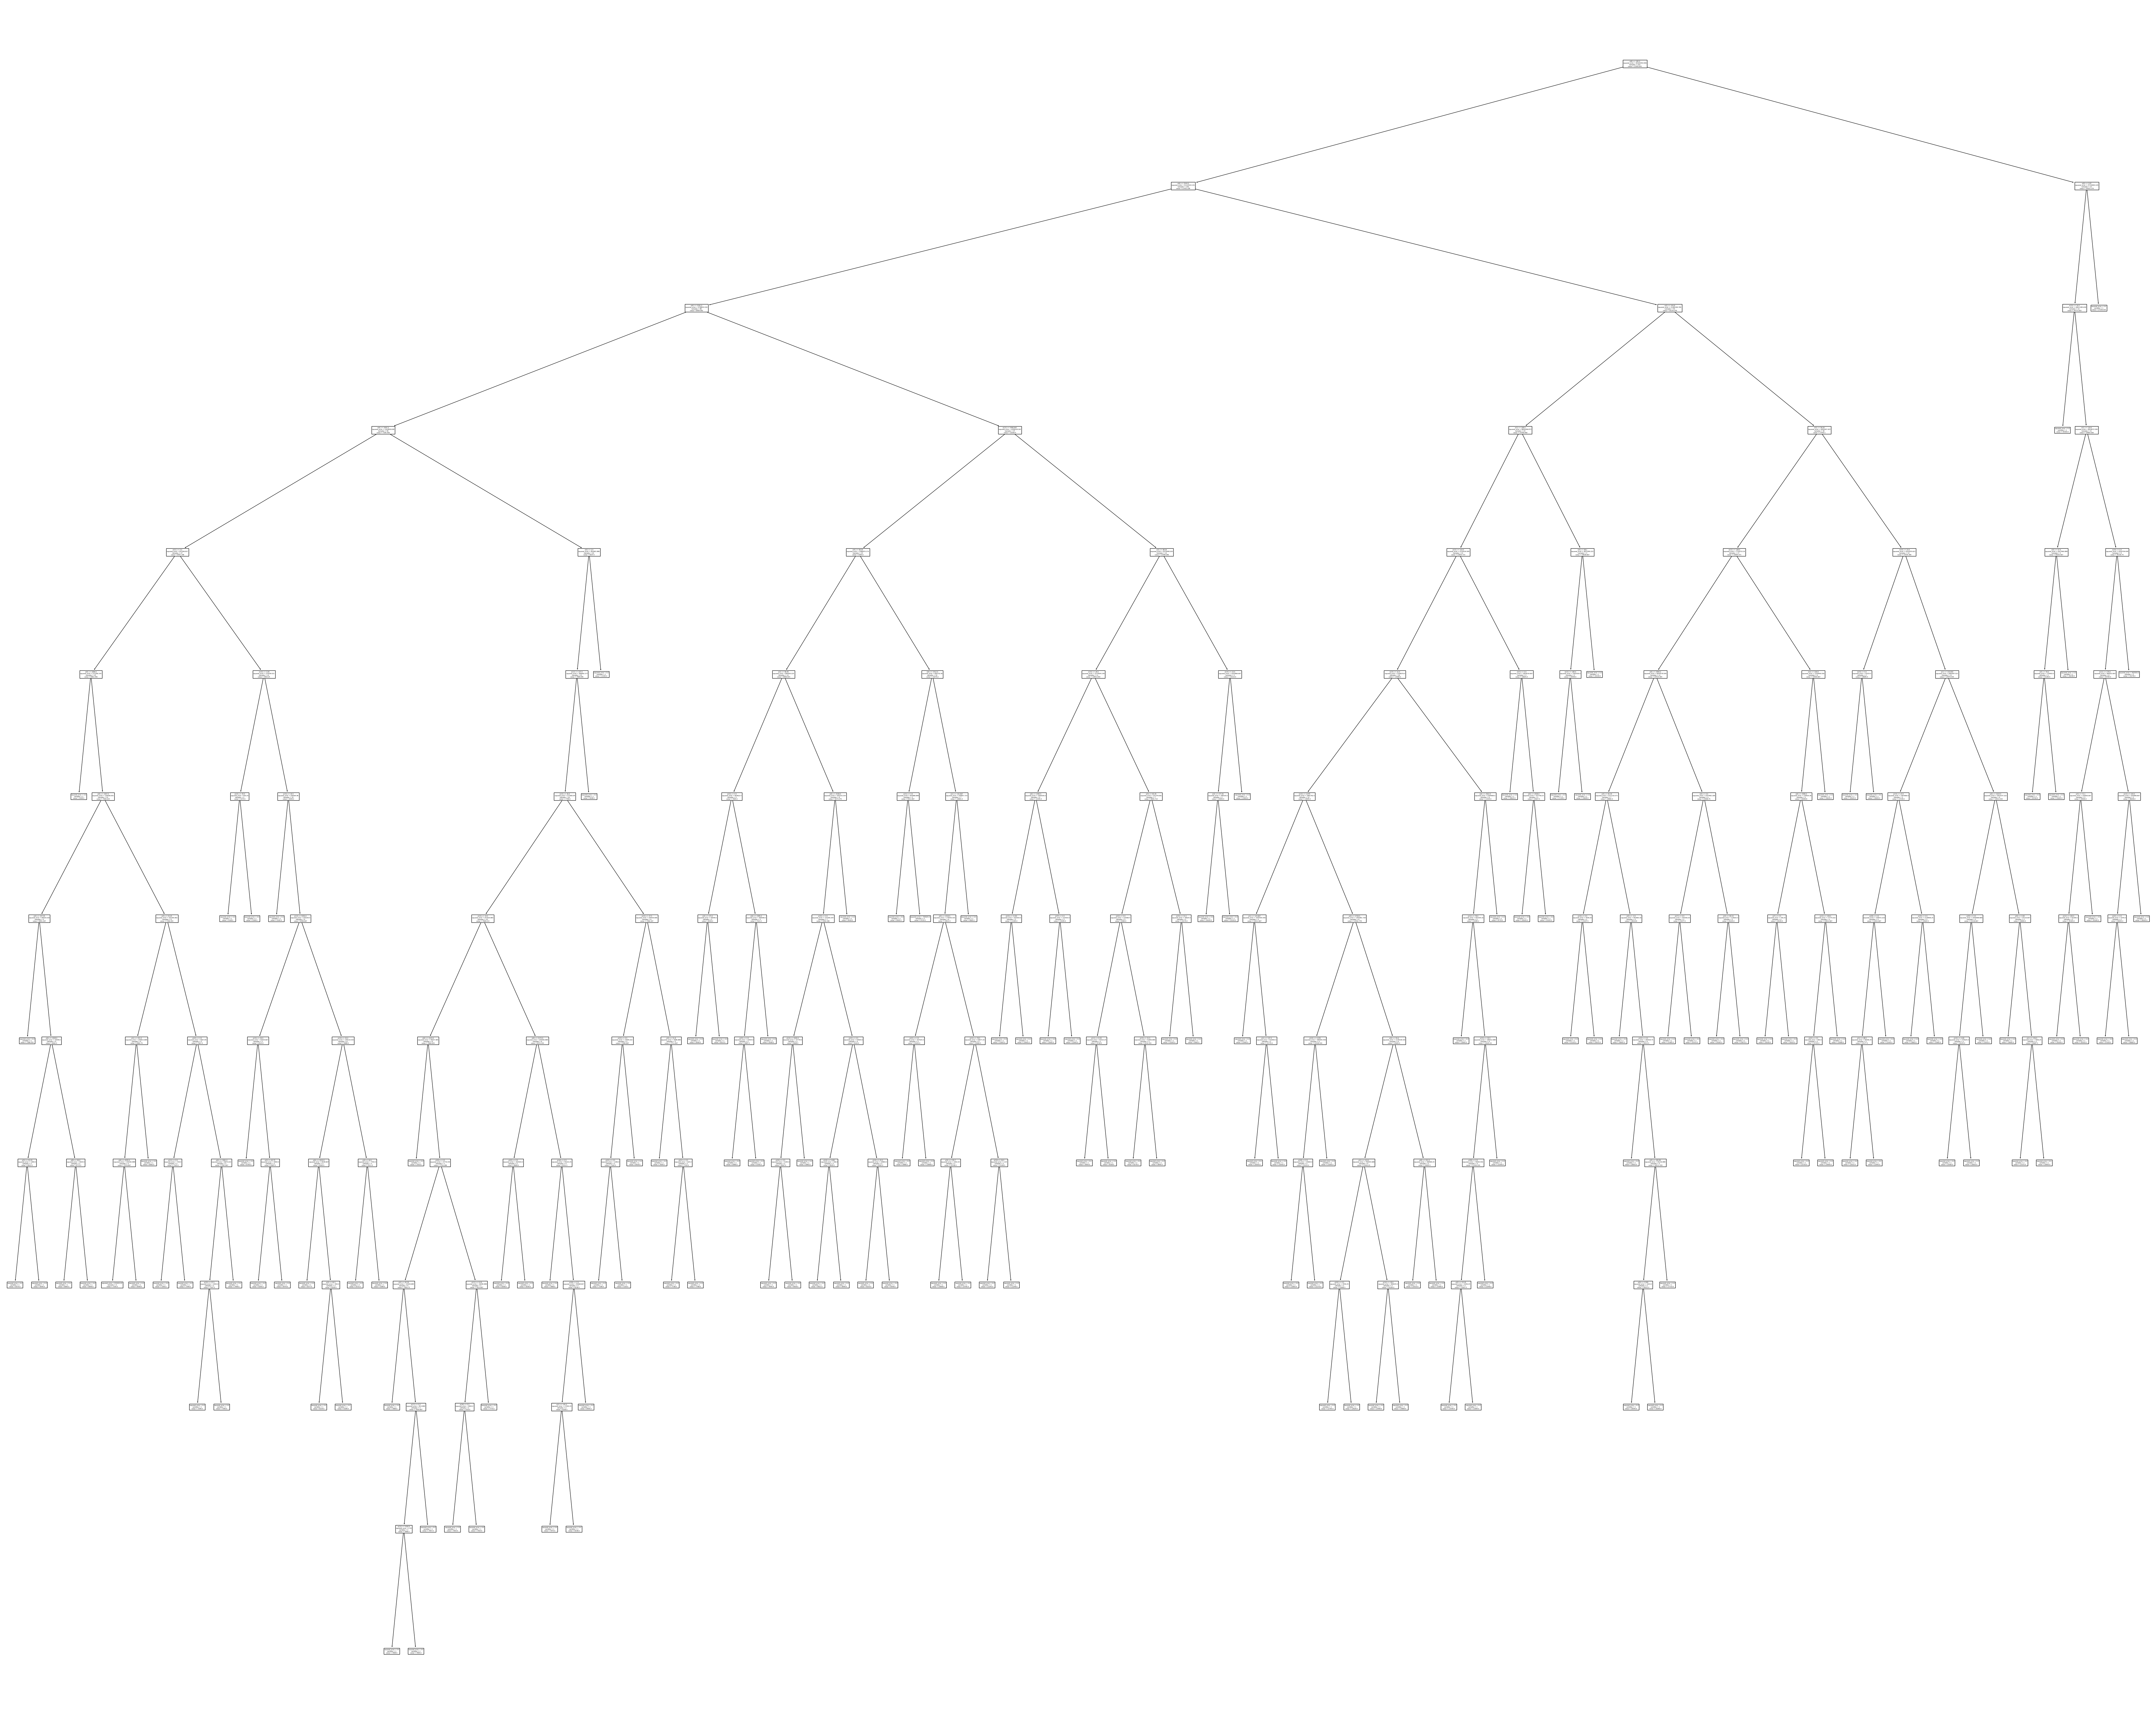

In [59]:
plt.figure(figsize=(100,80))
plot_tree(dt_reg)
plt.savefig('DT_Reg.jpg')

In [89]:
dt_reg = DecisionTreeRegressor(random_state=0)
hyp_grid = {"criterion" : ['squared_error','absolute_error'],
            "max_depth" : np.arange(6,12),
            "min_samples_split" : range(4,8),
            "min_samples_leaf" : range(3,7)}

gscv_dt_reg = GridSearchCV(dt_reg, hyp_grid , cv = 4, n_jobs=-1)
gscv_dt_reg.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([ 6,  7,  8,  9, 10, 11]),
                         'min_samples_leaf': range(3, 7),
                         'min_samples_split': range(4, 8)})

In [90]:
dt_reg=gscv_dt_reg.best_estimator_
dt_reg

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=4,
                      random_state=0)

In [91]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(dt_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 2078716.6867085106
RMSE: 1441.775532705598
MAE : 878.9544766054569
R-Squared : 0.965449364684686
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 5017584.522781352
RMSE: 2239.9965452610304
MAE : 1471.4768772893772
R-Squared : 0.9255749981783837


In [93]:
arr=dt_reg.feature_importances_

<Axes: >

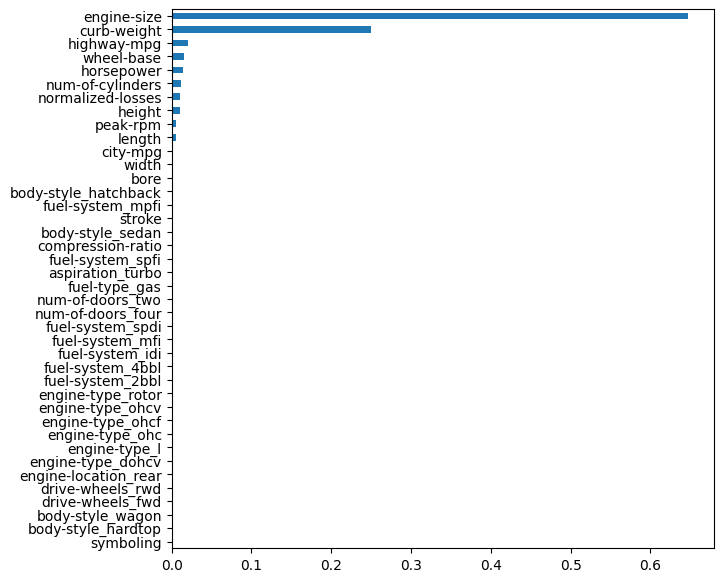

In [64]:
s1 = pd.Series(arr, index= x.columns)
plt.figure(figsize=(7,7))
s1.sort_values().plot(kind = 'barh')

In [94]:
rf_reg = RandomForestRegressor(random_state = 1)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [95]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(rf_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 1245744.2124443823
RMSE: 1116.1291199697203
MAE : 662.5946938997822
R-Squared : 0.9792943144895414
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 3956126.557772614
RMSE: 1989.0013971268634
MAE : 1334.695733974359
R-Squared : 0.9413194287147634


[1.54050166e-03 1.35441028e-02 1.32520672e-02 4.37105137e-03
 1.76505448e-02 6.93513198e-03 2.60346573e-01 3.04927921e-03
 5.46080980e-01 8.74965813e-03 3.69041863e-03 2.77068096e-03
 3.29204385e-02 5.22585271e-03 1.20068649e-02 5.40071462e-02
 2.41366111e-04 4.20118473e-04 4.48575110e-04 2.63099325e-04
 4.08039130e-04 2.34415942e-03 1.45628848e-03 5.45850127e-04
 3.52284107e-04 4.22797093e-04 4.99323679e-05 2.90977431e-03
 8.03859833e-05 1.86321551e-03 3.20339649e-05 3.51928946e-04
 2.63913297e-05 3.29509759e-04 1.30114433e-05 5.54663124e-04
 0.00000000e+00 6.41389592e-04 2.50135752e-05 7.88804942e-05]


<Axes: >

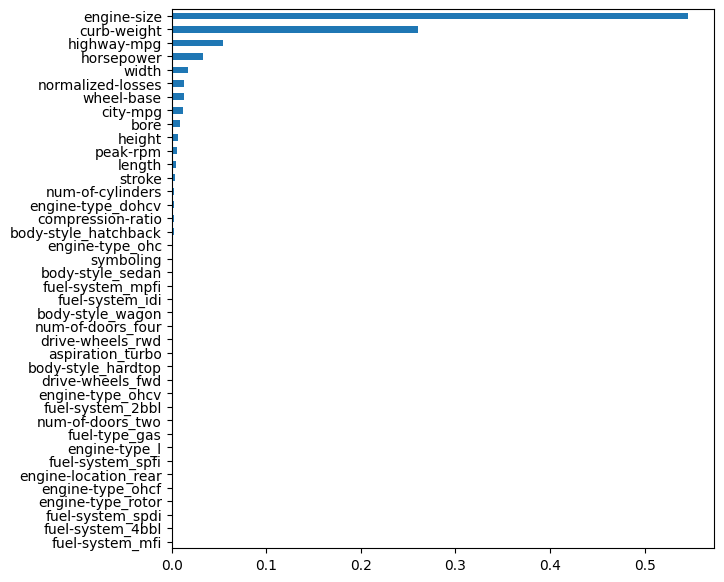

In [96]:
arr=rf_reg.feature_importances_
print(arr)
s1 = pd.Series(arr, index= x.columns)
plt.figure(figsize=(7,7))
s1.sort_values().plot(kind = 'barh')

In [107]:
imp_col = np.where(arr>=0.01)[0].tolist()
imp_col

[1, 2, 4, 6, 8, 12, 14, 15]

In [115]:
x = autos_df.iloc[:,imp_col]
x

normalized-losses  wheel-base  width  curb-weight  engine-size  \
0           103.333333        88.6   64.1         2548          130   
1           144.000000        88.6   64.1         2548          130   
2           144.000000        94.5   65.5         2823          152   
3           164.000000        99.8   66.2         2337          109   
4           164.000000        99.4   66.4         2824          136   
..                 ...         ...    ...          ...          ...   
200          95.000000       109.1   68.9         2952          141   
201          95.000000       109.1   68.8         3049          141   
202          95.000000       109.1   68.9         3012          173   
203          95.000000       109.1   68.9         3217          145   
204          95.000000       109.1   68.9         3062          141   

     horsepower  city-mpg  highway-mpg  
0         111.0        21           27  
1         111.0        21           27  
2         154.0        19           26  
3         102.0        24           30  
4         115.0        18           22  
..          ...       ...          ...  
200       114.0        23           28  
201       160.0        19           25  
202       134.0        18           23  
203       106.0        26           27  
204       114.0        19           25  

[205 rows x 8 columns]

In [123]:
x.columns.tolist()

['normalized-losses',
 'wheel-base',
 'width',
 'curb-weight',
 'engine-size',
 'horsepower',
 'city-mpg',
 'highway-mpg']

In [132]:
original_list = ['normalized-losses', 'wheel-base', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']

cleaned_list = [word.replace('-', '') for word in original_list]

print(cleaned_list)


['normalizedlosses', 'wheelbase', 'width', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']


In [133]:
x.columns = cleaned_list

In [134]:
x.describe()

normalizedlosses   wheelbase       width   curbweight  enginesize  \
count        205.000000  205.000000  205.000000   205.000000  205.000000   
mean         122.982114   98.756585   65.907805  2555.565854  126.907317   
std           32.752924    6.021776    2.145204   520.680204   41.642693   
min           65.000000   86.600000   60.300000  1488.000000   61.000000   
25%           95.000000   94.500000   64.100000  2145.000000   97.000000   
50%          120.666667   97.000000   65.500000  2414.000000  120.000000   
75%          146.666667  102.400000   66.900000  2935.000000  141.000000   
max          256.000000  120.900000   72.300000  4066.000000  326.000000   

       horsepower     citympg  highwaympg  
count  205.000000  205.000000  205.000000  
mean   104.214634   25.219512   30.751220  
std     39.521436    6.542142    6.886443  
min     48.000000   13.000000   16.000000  
25%     70.000000   19.000000   25.000000  
50%     95.000000   24.000000   30.000000  
75%    116.000000   30.000000   34.000000  
max    288.000000   49.000000   54.000000

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)


In [129]:
rf_reg = RandomForestRegressor(random_state = 1)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [130]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(rf_reg , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 1177756.3669671735
RMSE: 1085.244841944514
MAE : 635.0416437908497
R-Squared : 0.9804243497992962
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 3372917.874822276
RMSE: 1836.5505369638693
MAE : 1251.806314102564
R-Squared : 0.9499700667047938


In [119]:
#this is final model

In [131]:
with open('random_forest_reg.pkl', 'wb') as f:
    pickle.dump(rf_reg,f)

In [75]:
rf_reg = RandomForestRegressor(max_features='sqrt',random_state=0,
                               bootstrap=True,
                               oob_score=True,
                              n_jobs = -1)
hyp_grid = {"n_estimators":range(80,100,4),
            "criterion" : ['squared_error','absolute_error'],
            "max_depth" : range(8,12),
            "min_samples_split" : range(12,15),
            "min_samples_leaf" : range(6,10)}

gscv_rf_reg = GridSearchCV(rf_reg, hyp_grid , cv = 3, n_jobs=-1)
gscv_rf_reg.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features='sqrt', n_jobs=-1,
                                             oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(8, 12),
                         'min_samples_leaf': range(6, 10),
                         'min_samples_split': range(12, 15),
                         'n_estimators': range(80, 100, 4)})

In [79]:
rf_reg1=gscv_rf_reg.best_estimator_
rf_reg1

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=12, n_estimators=80, n_jobs=-1,
                      oob_score=True, random_state=0)

In [80]:
mod_eval=ModelEvaluation(x_train, x_test)
mod_eval.evaluation(rf_reg1 , y_train, y_test)

EVALUATION ON TRAINING DATA

MSE : 6787558.413989621
RMSE: 2605.2943046783835
MAE : 1636.9528260135573
R-Squared : 0.8871830601338548
--------------------------------------------------

EVALUATION ON TESTING DATA

MSE : 8751916.438044181
RMSE: 2958.363810967843
MAE : 1774.45409166163
R-Squared : 0.8701842701629253


<Axes: >

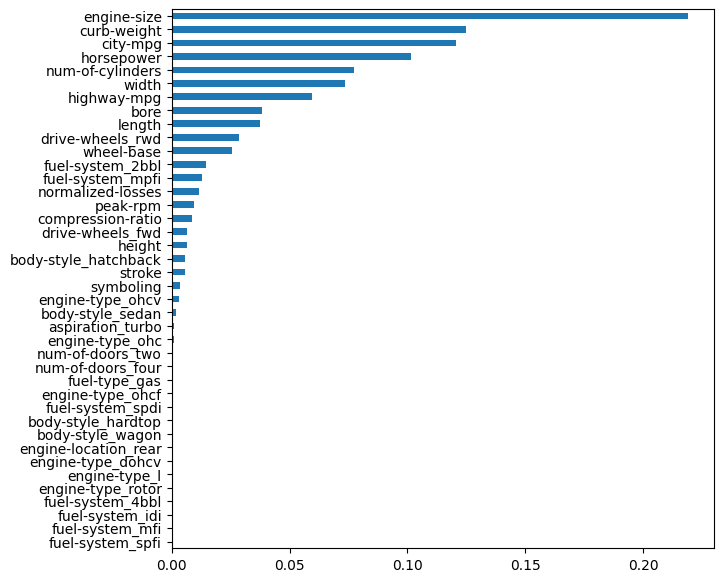

In [81]:
arr=rf_reg1.feature_importances_
s1 = pd.Series(arr, index= x.columns)
plt.figure(figsize=(7,7))
s1.sort_values().plot(kind = 'barh')